# 1. GPU/시스템 정보 확인

In [ ]:
# GPU/시스템 정보 확인
%%bash
echo "========================================================================"
echo "🖥️ 시스템 정보"
echo "========================================================================"
echo ""
echo "📅 현재 시간: $(date '+%Y-%m-%d %H:%M:%S')"
echo ""
echo "🔧 GPU 정보:"
nvidia-smi --query-gpu=name,memory.total,driver_version --format=csv,noheader
echo ""
echo "🔧 CUDA 버전:"
nvcc --version 2>/dev/null | grep "release" || echo "nvcc not found"
echo ""
echo "🔧 Python 버전:"
python --version
echo ""
echo "🔧 디스크 공간:"
df -h /content | tail -1 | awk '{print "   사용: " $3 " / " $2 " (" $5 " 사용중)"}'
echo ""
echo "========================================================================"

🖥️ 시스템 정보

📅 현재 시간: 2026-01-15 00:55:23

🔧 GPU 정보:
NVIDIA L4, 23034 MiB, 550.54.15

🔧 CUDA 버전:
Cuda compilation tools, release 12.5, V12.5.82

🔧 Python 버전:
Python 3.12.12

🔧 디스크 공간:
   사용: 39G / 236G (17% 사용중)



# 2. Miniconda + UV 설치

In [ ]:
# Miniconda + UV 설치
%%bash
set -e

echo "========================================================================"
echo "📦 Miniconda + UV 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

# Miniconda 설치
if [ ! -d "/content/conda" ]; then
    echo "1️⃣ Miniconda 다운로드 및 설치..."
    wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O /tmp/miniconda.sh
    bash /tmp/miniconda.sh -b -p /content/conda > /dev/null 2>&1
    rm /tmp/miniconda.sh
    echo "   ✅ Miniconda 설치 완료"
else
    echo "1️⃣ Miniconda 이미 설치됨"
fi

# UV 설치 (base 환경에)
if [ ! -f "/content/conda/bin/uv" ]; then
    echo "2️⃣ UV 설치..."
    /content/conda/bin/pip install uv -q
    echo "   ✅ UV 설치 완료"
else
    echo "2️⃣ UV 이미 설치됨"
fi

echo ""
echo "📋 UV 버전:"
/content/conda/bin/uv --version

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 Miniconda + UV 설치
📅 시작: 00:55:23

1️⃣ Miniconda 다운로드 및 설치...
   ✅ Miniconda 설치 완료
2️⃣ UV 설치...
   ✅ UV 설치 완료

📋 UV 버전:
uv 0.9.25

📅 완료: 00:55:39


# 3. Anaconda ToS 동의 + Python 3.10 환경 생성

In [ ]:
# Anaconda ToS 동의 + Python 3.10 conda 환경 생성
%%bash
set -e

echo "========================================================================"
echo "🐍 Python 3.10 conda 환경 생성"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

source /content/conda/bin/activate

# Anaconda Terms of Service 동의
echo "1️⃣ Anaconda Terms of Service 동의..."
conda config --set solver classic 2>/dev/null || true
echo "y" | conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main 2>/dev/null || true
echo "y" | conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r 2>/dev/null || true
conda config --add channels conda-forge 2>/dev/null || true
conda config --set channel_priority flexible 2>/dev/null || true
echo "   ✅ 설정 완료"
echo ""

if [ ! -d "/content/conda/envs/openmmlab" ]; then
    echo "2️⃣ openmmlab 환경 생성 중..."
    conda create -n openmmlab python=3.10 -c conda-forge -y -q 2>&1 | tail -5
    echo "   ✅ 환경 생성 완료"
else
    echo "2️⃣ openmmlab 환경 이미 존재"
fi

echo ""
echo "📋 Python 버전 확인:"
/content/conda/envs/openmmlab/bin/python --version
echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🐍 Python 3.10 conda 환경 생성
📅 시작: 00:55:39

1️⃣ Anaconda Terms of Service 동의...
accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r
   ✅ 설정 완료

2️⃣ openmmlab 환경 생성 중...


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
   ✅ 환경 생성 완료

📋 Python 버전 확인:
Python 3.10.19

📅 완료: 00:56:15


# 4. NumPy 1.26.4 설치

In [ ]:
# NumPy 1.26.4 설치
%%bash
set -e

echo "========================================================================"
echo "📦 NumPy 1.26.4 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ NumPy 설치 중..."
$UV pip install numpy==1.26.4 --python $PY -q

echo ""
echo "📋 NumPy 버전 확인:"
$PY -c "import numpy; print(f'   NumPy: {numpy.__version__}')"
echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 NumPy 1.26.4 설치
📅 시작: 00:56:15

1️⃣ NumPy 설치 중...

📋 NumPy 버전 확인:
   NumPy: 1.26.4

📅 완료: 00:56:16


# 5. PyTorch 2.1.2 + CUDA 11.8 설치

In [ ]:
# PyTorch 2.1.2 + CUDA 11.8 설치
%%bash
set -e

echo "========================================================================"
echo "🔥 PyTorch 2.1.2 + CUDA 11.8 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ PyTorch 설치 중 (약 1분 소요)..."
$UV pip install torch==2.1.2 torchvision==0.16.2 \
    --index-url https://download.pytorch.org/whl/cu118 \
    --python $PY -q

echo ""
echo "📋 설치 확인:"
$PY -c "
import torch
print(f'   PyTorch: {torch.__version__}')
print(f'   CUDA 사용 가능: {torch.cuda.is_available()}')
if torch.cuda.is_available():
    print(f'   GPU: {torch.cuda.get_device_name(0)}')
    print(f'   CUDA 버전: {torch.version.cuda}')
"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🔥 PyTorch 2.1.2 + CUDA 11.8 설치
📅 시작: 00:56:16

1️⃣ PyTorch 설치 중 (약 1분 소요)...

📋 설치 확인:
   PyTorch: 2.1.2+cu118
   CUDA 사용 가능: True
   GPU: NVIDIA L4
   CUDA 버전: 11.8

📅 완료: 00:56:46


# 6. OpenMMLab 스택 설치

In [ ]:
# OpenMMLab 스택 설치 (mmcv, mmengine, mmdet)
%%bash
set -e

echo "========================================================================"
echo "📦 OpenMMLab 스택 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ mmcv 2.1.0 설치 중..."
$UV pip install mmcv==2.1.0 \
    -f https://download.openmmlab.com/mmcv/dist/cu118/torch2.1/index.html \
    --python $PY -q
echo "   ✅ mmcv 설치 완료"

echo "2️⃣ mmengine 설치 중..."
$UV pip install mmengine==0.10.7 --python $PY -q
echo "   ✅ mmengine 설치 완료"

echo "3️⃣ mmdet 설치 중..."
$UV pip install mmdet==3.3.0 --python $PY -q
echo "   ✅ mmdet 설치 완료"

echo ""
echo "📋 설치 확인:"
$PY -c "
import mmcv
import mmengine
import mmdet
print(f'   mmcv: {mmcv.__version__}')
print(f'   mmengine: {mmengine.__version__}')
print(f'   mmdet: {mmdet.__version__}')
"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 OpenMMLab 스택 설치
📅 시작: 00:56:46

1️⃣ mmcv 2.1.0 설치 중...
   ✅ mmcv 설치 완료
2️⃣ mmengine 설치 중...
   ✅ mmengine 설치 완료
3️⃣ mmdet 설치 중...
   ✅ mmdet 설치 완료

📋 설치 확인:
   mmcv: 2.1.0
   mmengine: 0.10.7
   mmdet: 3.3.0

📅 완료: 00:56:53


# 7. MMDetection3D v1.4.0 설치 + 패치

In [ ]:
# MMDetection3D v1.4.0 설치 + np.long 패치
%%bash
set -e

echo "========================================================================"
echo "📦 MMDetection3D v1.4.0 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

cd /content

# 클론
if [ ! -d "mmdetection3d" ]; then
    echo "1️⃣ MMDetection3D 클론 중..."
    git clone -b v1.4.0 --depth 1 https://github.com/open-mmlab/mmdetection3d.git 2>/dev/null
    echo "   ✅ 클론 완료"
else
    echo "1️⃣ MMDetection3D 이미 존재"
fi

# 런타임 의존성 설치
echo "2️⃣ 런타임 의존성 설치 중..."
cd mmdetection3d
$UV pip install -r requirements/runtime.txt --python $PY -q 2>/dev/null || true
$UV pip install "nuscenes-devkit==1.1.11" --python $PY -q 2>/dev/null || true
echo "   ✅ 의존성 설치 완료"

# np.long → np.int64 패치
echo "3️⃣ NumPy 호환성 패치 적용 중..."
find /content/mmdetection3d -name "*.py" -exec grep -l "np\.long[^a-z]" {} \; 2>/dev/null | while read f; do
    sed -i 's/np\.long\([^a-z]\)/np.int64\1/g' "$f"
done
echo "   ✅ np.long → np.int64 패치 완료"

echo ""
echo "📋 설치 확인:"
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
$PY -c "import mmdet3d; print(f'   mmdet3d: {mmdet3d.__version__}')"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 MMDetection3D v1.4.0 설치
📅 시작: 00:56:53

1️⃣ MMDetection3D 클론 중...
   ✅ 클론 완료
2️⃣ 런타임 의존성 설치 중...
   ✅ 의존성 설치 완료
3️⃣ NumPy 호환성 패치 적용 중...
   ✅ np.long → np.int64 패치 완료

📋 설치 확인:
   mmdet3d: 1.4.0

📅 완료: 00:57:18


# 8. numba 0.56.4 설치 (PTX 호환성) + 의존성 검증

In [ ]:
# numba 설정 (CUDA 비활성화 + CPU fallback)
%%bash
set -e

echo "========================================================================"
echo "🔧 numba 설정 (CUDA 호환성 문제 해결)"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH

# numba 0.57.1 설치 (중간 버전)
echo "1️⃣ numba 0.57.1 + llvmlite 0.40.1 설치..."
$UV pip uninstall numba llvmlite -y --python $PY -q 2>/dev/null || true
$UV pip install numba==0.57.1 llvmlite==0.40.1 --python $PY -q
echo "   ✅ numba 0.57.1 설치 완료"

# numba 캐시 삭제
echo ""
echo "2️⃣ numba 캐시 삭제..."
rm -rf ~/.cache/numba
rm -rf /root/.cache/numba
rm -rf /content/mmdetection3d/mmdet3d/evaluation/functional/kitti_utils/__pycache__
find /content/mmdetection3d -name "*.nbc" -delete 2>/dev/null || true
find /content/mmdetection3d -name "*.nbi" -delete 2>/dev/null || true
echo "   ✅ 캐시 삭제 완료"

# ⚠️ 핵심: numba CUDA 비활성화 설정 파일 생성
echo ""
echo "3️⃣ numba CUDA 비활성화 설정..."
mkdir -p /content/conda/envs/openmmlab/etc/conda/activate.d
cat > /content/conda/envs/openmmlab/etc/conda/activate.d/env_vars.sh << 'ENVEOF'
#!/bin/bash
export NUMBA_DISABLE_CUDA=1
ENVEOF
chmod +x /content/conda/envs/openmmlab/etc/conda/activate.d/env_vars.sh
echo "   ✅ NUMBA_DISABLE_CUDA=1 설정 완료"

echo ""
echo "4️⃣ 의존성 확인:"
$PY << 'EOF'
import os
os.environ['NUMBA_DISABLE_CUDA'] = '1'  # Python 내에서도 설정

import sys
print(f"   Python: {sys.version.split()[0]}")

import numpy as np
print(f"   NumPy: {np.__version__}")

import torch
print(f"   PyTorch: {torch.__version__}")
print(f"   CUDA available: {torch.cuda.is_available()}")

import mmcv
print(f"   mmcv: {mmcv.__version__}")

import mmengine
print(f"   mmengine: {mmengine.__version__}")

import mmdet
print(f"   mmdet: {mmdet.__version__}")

import mmdet3d
print(f"   mmdet3d: {mmdet3d.__version__}")

import numba
print(f"   numba: {numba.__version__}")
print(f"   NUMBA_DISABLE_CUDA: {os.environ.get('NUMBA_DISABLE_CUDA', 'not set')}")

import llvmlite
print(f"   llvmlite: {llvmlite.__version__}")

if torch.cuda.is_available():
    print(f"\n   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
EOF

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🔧 numba 설정 (CUDA 호환성 문제 해결)
📅 시작: 00:57:18

1️⃣ numba 0.57.1 + llvmlite 0.40.1 설치...
   ✅ numba 0.57.1 설치 완료

2️⃣ numba 캐시 삭제...
   ✅ 캐시 삭제 완료

3️⃣ numba CUDA 비활성화 설정...
   ✅ NUMBA_DISABLE_CUDA=1 설정 완료

4️⃣ 의존성 확인:
   Python: 3.10.19
   NumPy: 1.24.4
   PyTorch: 2.1.2+cu118
   CUDA available: True
   mmcv: 2.1.0
   mmengine: 0.10.7
   mmdet: 3.3.0
   mmdet3d: 1.4.0
   numba: 0.57.1
   NUMBA_DISABLE_CUDA: 1
   llvmlite: 0.40.1

   GPU: NVIDIA L4
   GPU Memory: 22.2 GB

📅 완료: 00:57:22


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive/nuscenes_raw/v1.0-mini \
      /content/mmdetection3d/data/nuscenes

In [ ]:
%cd /content/mmdetection3d

!python tools/train.py \
  configs/centerpoint/centerpoint_pillar02_second_secfpn_8xb4-cyclic-20e_nus-3d.py \
  --work-dir work_dirs/centerpoint_a100

/content/mmdetection3d
Traceback (most recent call last):
  File "/content/mmdetection3d/tools/train.py", line 7, in <module>
    from mmengine.config import Config, DictAction
ModuleNotFoundError: No module named 'mmengine'


In [ ]:
%%bash
set -e

echo "🚀 CenterPoint Training Start"

# 1. conda 환경 활성화
source /content/conda/bin/activate openmmlab

# 2. 프로젝트 디렉토리
cd /content/mmdetection3d

# 3. 환경 변수
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
export NUMBA_DISABLE_CUDA=1

# 4. Python 경로 고정
PY=/content/conda/envs/openmmlab/bin/python


# 6. 학습 실행
$PY tools/train.py \
  configs/centerpoint/centerpoint_pillar02_second_secfpn_8xb4-cyclic-20e_nus-3d.py \
  --work-dir work_dirs/centerpoint_l4


🚀 CenterPoint Training Start
01/15 01:20:21 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1246517137
    GPU 0: NVIDIA L4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.5, V12.5.82
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
    PyTorch: 2.1.2+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.8
  - NVCC architec

/content/conda/envs/openmmlab/lib/python3.10/site-packages/torch/utils/cpp_extension.py:28: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]
/content/mmdetection3d/mmdet3d/evaluation/functional/kitti_utils/eval.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_thresholds(scores: np.ndarray, num_gt, num_sample_pts=41):
/content/mmdetection3d/mmdet3d/models/task_modules/coders/centerpoint_bbox_coders.py:207: 

CalledProcessError: Command 'b'set -e\n\necho "\xf0\x9f\x9a\x80 CenterPoint Training Start"\n\n# 1. conda \xed\x99\x98\xea\xb2\xbd \xed\x99\x9c\xec\x84\xb1\xed\x99\x94\nsource /content/conda/bin/activate openmmlab\n\n# 2. \xed\x94\x84\xeb\xa1\x9c\xec\xa0\x9d\xed\x8a\xb8 \xeb\x94\x94\xeb\xa0\x89\xed\x86\xa0\xeb\xa6\xac\ncd /content/mmdetection3d\n\n# 3. \xed\x99\x98\xea\xb2\xbd \xeb\xb3\x80\xec\x88\x98\nexport PYTHONPATH=/content/mmdetection3d:$PYTHONPATH\nexport NUMBA_DISABLE_CUDA=1\n\n# 4. Python \xea\xb2\xbd\xeb\xa1\x9c \xea\xb3\xa0\xec\xa0\x95\nPY=/content/conda/envs/openmmlab/bin/python\n\n\n# 6. \xed\x95\x99\xec\x8a\xb5 \xec\x8b\xa4\xed\x96\x89\n$PY tools/train.py \\\n  configs/centerpoint/centerpoint_pillar02_second_secfpn_8xb4-cyclic-20e_nus-3d.py \\\n  --work-dir work_dirs/centerpoint_l4 \n'' returned non-zero exit status 1.

##학습결과요약

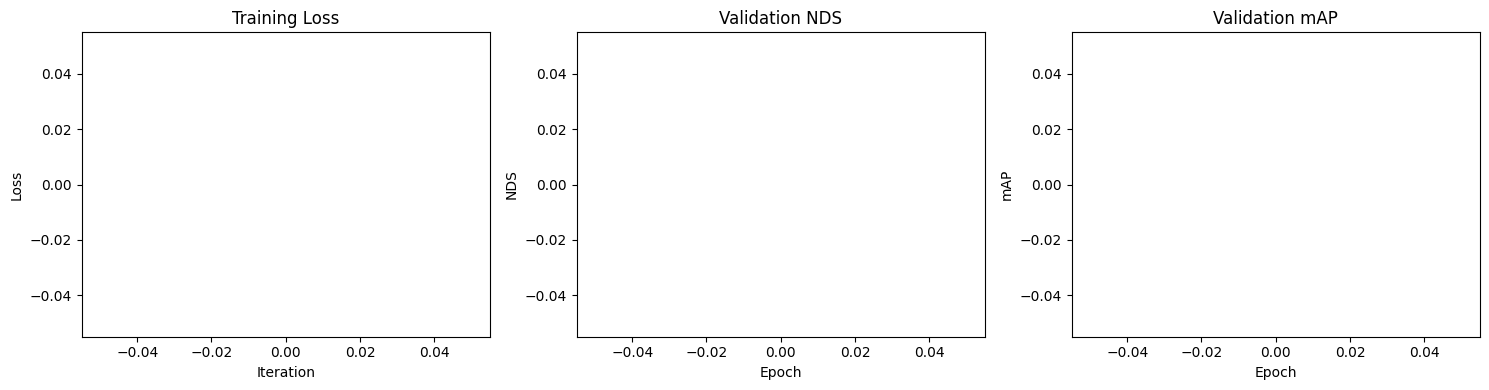

In [ ]:
import os
import json
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt

work_dir = "/content/mmdetection3d/work_dirs/centerpoint_l4"  # 네 work_dir로 수정

log_file = [
    os.path.join(work_dir, f)
    for f in os.listdir(work_dir)
    if f.endswith(".log")
][0]

logs = []
with open(log_file, "r") as f:
    for line in f:
        logs.append(json.loads(line))

iters = []
losses = []
nds = []
map_ = []


with open(log_file, "r") as f:
    for line in f:
        log = json.loads(line)

        if "iter" in log and "loss" in log:
            iters.append(log["iter"])
            losses.append(log["loss"])

        if "NuScenes/NDS" in log:
            nds.append(log["NuScenes/NDS"])

        if "NuScenes/mAP" in log:
            map_.append(log["NuScenes/mAP"])

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(iters, losses)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1,3,2)
plt.plot(nds)
plt.title("Validation NDS")
plt.xlabel("Epoch")
plt.ylabel("NDS")

plt.subplot(1,3,3)
plt.plot(map_)
plt.title("Validation mAP")
plt.xlabel("Epoch")
plt.ylabel("mAP")

plt.tight_layout()
plt.show()

In [ ]:
vis_dir = "/content/mmdetection3d/work_dirs/centerpoint_l4/vis_data"

json_file = os.path.join(
    vis_dir,
    sorted(os.listdir(vis_dir))[0]
)

print("Using:", json_file)

FileNotFoundError: [Errno 2] No such file or directory: '/content/mmdetection3d/work_dirs/centerpoint_l4/vis_data'

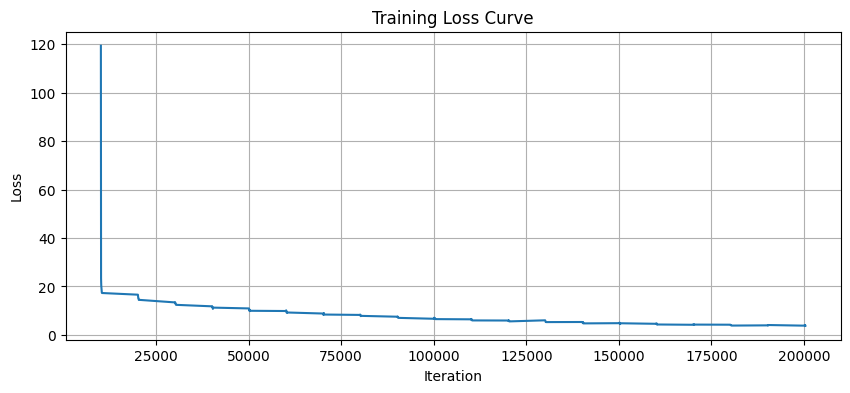

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(iters, losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

---

found: 1


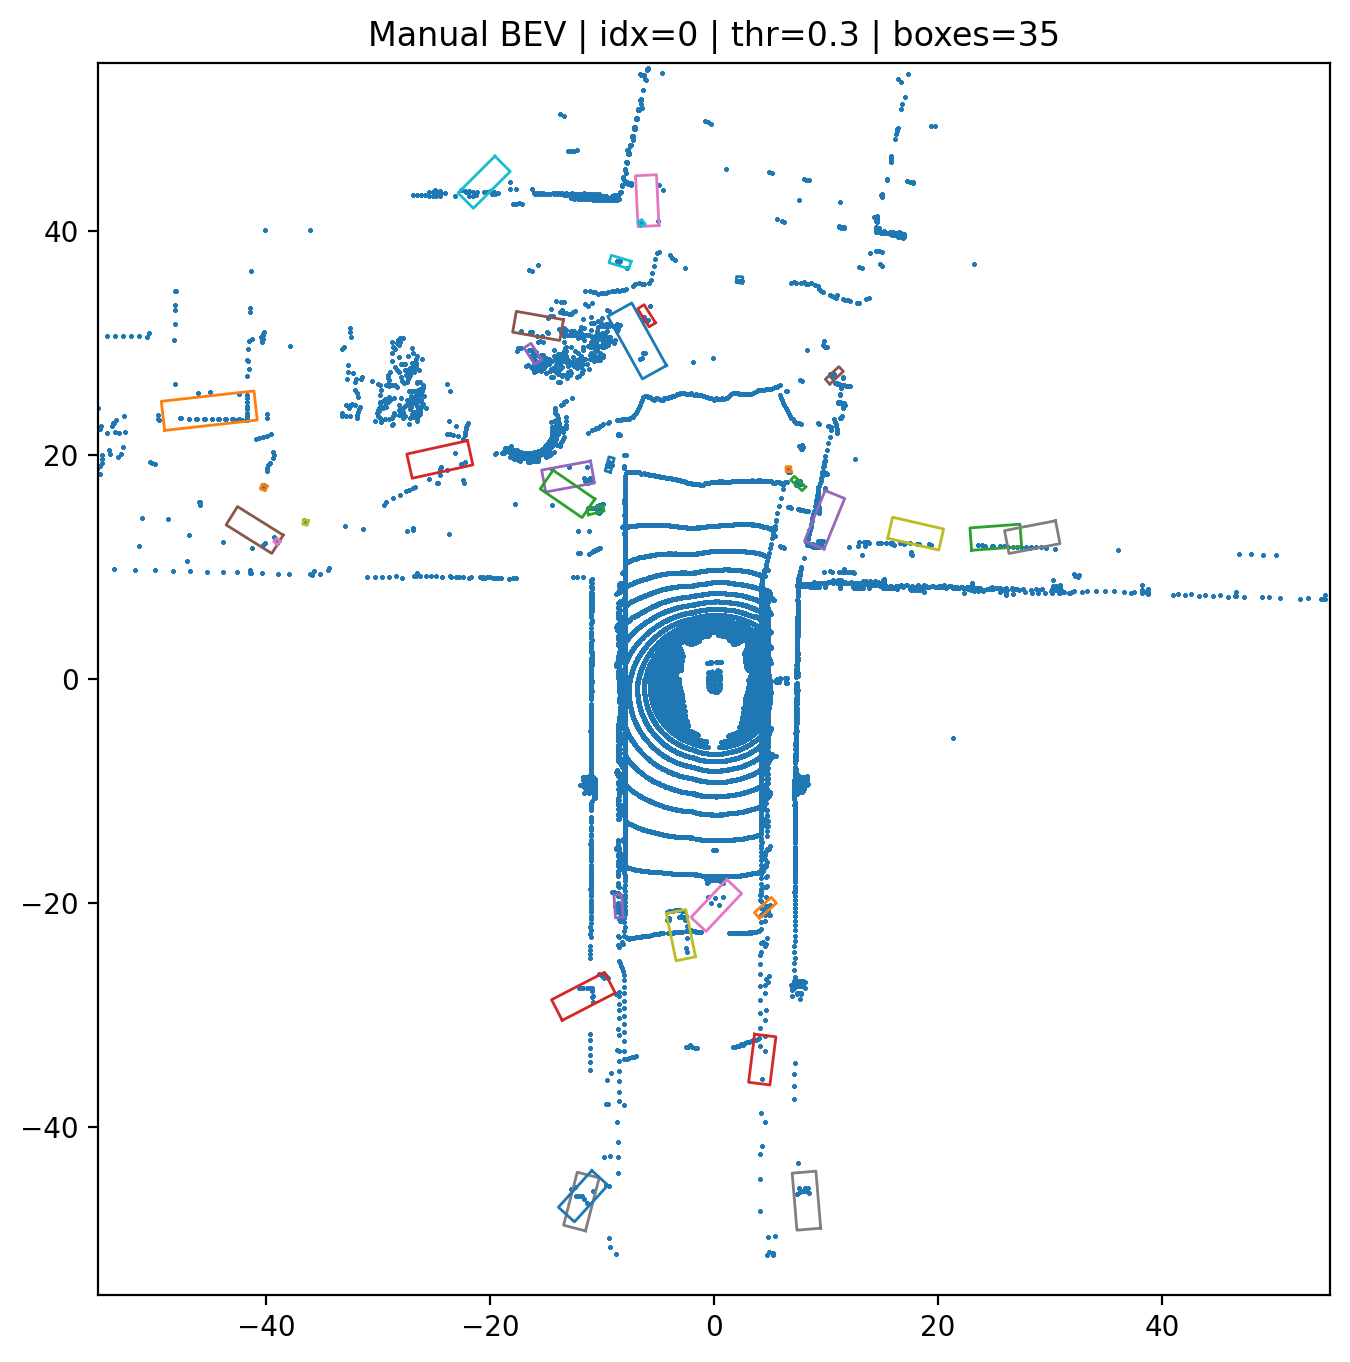

In [ ]:
from PIL import Image
from IPython.display import display
import glob

files = sorted(glob.glob("/content/mmdetection3d/vis_results/bev_manual_*.png"))
print("found:", len(files))
display(Image.open(files[-1]))


In [ ]:
%%bash
set -e
source /content/conda/bin/activate openmmlab
cd /content/mmdetection3d
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
export NUMBA_DISABLE_CUDA=1
PY=/content/conda/envs/openmmlab/bin/python

$PY << 'EOF'
import os, glob, warnings
import numpy as np
import torch

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

from mmengine.config import Config
from mmengine.logging import MMLogger
from mmengine.registry import init_default_scope
from mmengine.dataset import default_collate

from mmdet3d.apis import init_model
from mmdet3d.registry import DATASETS

# nuScenes devkit
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
from nuscenes.utils.geometry_utils import view_points
from pyquaternion import Quaternion
import cv2

# -------------------------
# 설정
# -------------------------
CFG_FILE = "configs/centerpoint/centerpoint_pillar02_second_secfpn_8xb4-cyclic-20e_nus-3d.py"
WORK_DIR = "/content/mmdetection3d/work_dirs/centerpoint_l4"
DATA_ROOT = "/content/mmdetection3d/data/nuscenes"
VERSION = "v1.0-mini"   # mini면 이거, full trainval이면 v1.0-trainval 로 바꾸세요.
CAM = "CAM_FRONT"

OUT_DIR = "/content/mmdetection3d/vis_results"
os.makedirs(OUT_DIR, exist_ok=True)

NUM_SAMPLES = 10         # 몇 장 만들지
SCORE_THR = 0.6
MAX_BOXES = 80
RANGE_XY = 55.0

# -------------------------
# 로그/경고 최소화
# -------------------------
logger = MMLogger.get_instance('mmengine')
logger.setLevel('ERROR')
warnings.filterwarnings("ignore", message="To copy construct from a tensor*")

init_default_scope("mmdet3d")

# -------------------------
# CKPT 자동 선택
# -------------------------
ckpts = sorted(glob.glob(os.path.join(WORK_DIR, "*.pth")))
assert ckpts, f"No .pth in {WORK_DIR}"
CKPT = ckpts[-1]

# -------------------------
# cfg / dataset / model
# -------------------------
cfg = Config.fromfile(CFG_FILE)
cfg.load_from = CKPT

# dataset build (lidar 기반)
cfg.test_dataloader.dataset.data_root = DATA_ROOT
cfg.test_dataloader.dataset.ann_file = "nuscenes_infos_val.pkl"
dataset = DATASETS.build(cfg.test_dataloader.dataset)

model = init_model(cfg, CKPT, device="cuda:0")
model.eval()

# nuScenes API (카메라 이미지/좌표변환용)
nusc = NuScenes(version=VERSION, dataroot=DATA_ROOT, verbose=False)

def yaw_to_rot2(yaw: float) -> np.ndarray:
    c, s = np.cos(yaw), np.sin(yaw)
    return np.array([[c, -s],[s, c]], dtype=np.float32)

def box_bev_corners(x, y, dx, dy, yaw):
    local = np.array([[ dx/2,  dy/2],
                      [ dx/2, -dy/2],
                      [-dx/2, -dy/2],
                      [-dx/2,  dy/2]], dtype=np.float32)
    R = yaw_to_rot2(yaw)
    return (local @ R.T) + np.array([x, y], dtype=np.float32)

def get_sample_token_from_mmdet3d(info: dict) -> str:
    # mmdet3d nuscenes info는 보통 'token'이 들어있습니다.
    if "token" in info:
        return info["token"]
    # 혹시 다른 키면 아래 확장
    raise KeyError("Cannot find sample token in dataset info. Keys: " + str(list(info.keys())))

def lidar_pred_to_nusc_boxes(boxes_tensor, scores, labels, score_thr):
    # mmdet3d CenterPoint: boxes_tensor shape (N,9) [x,y,z,dx,dy,dz,yaw,vx,vy] in LIDAR frame
    keep = np.where(scores >= score_thr)[0]
    out = []
    for i in keep:
        x,y,z,dx,dy,dz,yaw = boxes_tensor[i,0],boxes_tensor[i,1],boxes_tensor[i,2],boxes_tensor[i,3],boxes_tensor[i,4],boxes_tensor[i,5],boxes_tensor[i,6]
        q = Quaternion(axis=[0,0,1], angle=float(yaw))
        out.append(Box(center=[float(x),float(y),float(z)],
                       size=[float(dx),float(dy),float(dz)],
                       orientation=q,
                       label=int(labels[i]),
                       score=float(scores[i])))
    return out

def transform_box_lidar_to_cam(nusc, box_lidar: Box, lidar_sd_token: str, cam_sd_token: str) -> Box:
    """
    box_lidar: LIDAR_TOP frame
    return: camera frame box
    """
    box = box_lidar.copy()

    # LIDAR_TOP sample_data
    lidar_sd = nusc.get("sample_data", lidar_sd_token)
    lidar_calib = nusc.get("calibrated_sensor", lidar_sd["calibrated_sensor_token"])
    lidar_pose  = nusc.get("ego_pose", lidar_sd["ego_pose_token"])

    # CAMERA sample_data
    cam_sd = nusc.get("sample_data", cam_sd_token)
    cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
    cam_pose  = nusc.get("ego_pose", cam_sd["ego_pose_token"])

    # lidar -> ego (lidar time)
    box.rotate(Quaternion(lidar_calib["rotation"]))
    box.translate(np.array(lidar_calib["translation"]))

    # ego(lidar time) -> global
    box.rotate(Quaternion(lidar_pose["rotation"]))
    box.translate(np.array(lidar_pose["translation"]))

    # global -> ego(cam time)
    box.translate(-np.array(cam_pose["translation"]))
    box.rotate(Quaternion(cam_pose["rotation"]).inverse)

    # ego -> cam
    box.translate(-np.array(cam_calib["translation"]))
    box.rotate(Quaternion(cam_calib["rotation"]).inverse)

    return box

def draw_box_on_image(img_bgr, box_cam: Box, cam_intrinsic, color=(0,255,0), thickness=2):
    # 3D box corners in camera frame (3,8)
    corners = box_cam.corners()
    # only draw if in front of camera
    if np.all(corners[2, :] <= 0.1):
        return img_bgr

    # project to image (3,8) -> (2,8)
    pts_2d = view_points(corners, np.array(cam_intrinsic), normalize=True)[:2, :].T
    pts_2d = pts_2d.astype(np.int32)

    # 12 edges
    edges = [
        (0,1),(1,2),(2,3),(3,0),  # bottom
        (4,5),(5,6),(6,7),(7,4),  # top
        (0,4),(1,5),(2,6),(3,7)   # verticals
    ]
    h,w = img_bgr.shape[:2]
    for a,b in edges:
        x1,y1 = pts_2d[a]
        x2,y2 = pts_2d[b]
        # optional: clip/skip out-of-range
        if (x1<-2000 or x1> w+2000 or y1<-2000 or y1> h+2000 or
            x2<-2000 or x2> w+2000 or y2<-2000 or y2> h+2000):
            continue
        cv2.line(img_bgr, (x1,y1), (x2,y2), color, thickness, lineType=cv2.LINE_AA)
    return img_bgr

# -------------------------
# 루프: 여러 장 저장
# -------------------------
for idx in range(min(NUM_SAMPLES, len(dataset))):
    sample = dataset[idx]
    info = dataset.get_data_info(idx) if hasattr(dataset, "get_data_info") else {}
    sample_token = get_sample_token_from_mmdet3d(info)

    # nuScenes sample
    nusc_sample = nusc.get("sample", sample_token)
    lidar_sd_token = nusc_sample["data"]["LIDAR_TOP"]
    cam_sd_token = nusc_sample["data"][CAM]

    # -------- inference (lidar) --------
    with torch.no_grad():
        batch = default_collate([sample])
        batch = model.data_preprocessor(batch, False)
        out = model.test_step(batch)[0]

    pi3d = out.pred_instances_3d
    scores = pi3d.scores_3d.detach().cpu().numpy()
    labels = pi3d.labels_3d.detach().cpu().numpy()
    boxes_tensor = pi3d.bboxes_3d.tensor.detach().cpu().numpy()

    # pred boxes (nuscenes Box in lidar frame)
    pred_boxes = lidar_pred_to_nusc_boxes(boxes_tensor, scores, labels, SCORE_THR)
    # limit top-K
    pred_boxes = sorted(pred_boxes, key=lambda b: b.score, reverse=True)[:MAX_BOXES]

    # -------- GT boxes (nuScenes API) --------
    gt_boxes_global = []
    for ann_token in nusc_sample["anns"]:
        ann = nusc.get("sample_annotation", ann_token)
        # ann box in global
        gt_boxes_global.append(Box(center=ann["translation"],
                                   size=ann["size"],
                                   orientation=Quaternion(ann["rotation"])))
    # (global -> lidar frame) for BEV overlay
    lidar_sd = nusc.get("sample_data", lidar_sd_token)
    lidar_calib = nusc.get("calibrated_sensor", lidar_sd["calibrated_sensor_token"])
    lidar_pose  = nusc.get("ego_pose", lidar_sd["ego_pose_token"])

    gt_boxes_lidar = []
    for b in gt_boxes_global:
        bb = b.copy()
        # global -> ego(lidar)
        bb.translate(-np.array(lidar_pose["translation"]))
        bb.rotate(Quaternion(lidar_pose["rotation"]).inverse)
        # ego -> lidar
        bb.translate(-np.array(lidar_calib["translation"]))
        bb.rotate(Quaternion(lidar_calib["rotation"]).inverse)
        gt_boxes_lidar.append(bb)

    # -------- BEV plot: points + pred + gt --------
    pts = sample["inputs"]["points"]
    pts_np = pts.cpu().numpy() if hasattr(pts, "cpu") else np.asarray(pts)

    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.scatter(pts_np[:,0], pts_np[:,1], s=0.2)

    # pred (색은 matplotlib 기본 cycle)
    # draw as rectangles from tensor for speed
    keep = np.where(scores >= SCORE_THR)[0]
    keep = keep[np.argsort(scores[keep])[::-1]][:MAX_BOXES]
    for k in keep:
        x, y = boxes_tensor[k,0], boxes_tensor[k,1]
        dx, dy = boxes_tensor[k,3], boxes_tensor[k,4]
        yaw = boxes_tensor[k,6]
        corners = box_bev_corners(x, y, dx, dy, yaw)
        poly = np.vstack([corners, corners[0:1]])
        ax.plot(poly[:,0], poly[:,1], linewidth=1.0)

    # GT (검정 두꺼운 선)
    for b in gt_boxes_lidar:
        c = b.corners()[:2,:].T  # (8,2)
        # 아래 4개를 바닥면으로 사용 (nuscenes Box corners ordering)
        base = c[[0,1,2,3], :]
        poly = np.vstack([base, base[0:1]])
        ax.plot(poly[:,0], poly[:,1], linewidth=2.0)

    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim([-RANGE_XY, RANGE_XY])
    ax.set_ylim([-RANGE_XY, RANGE_XY])
    ax.set_title(f"BEV | idx={idx} | thr={SCORE_THR} | pred={len(keep)} | gt={len(gt_boxes_lidar)}")

    bev_path = os.path.join(OUT_DIR, f"bev_idx{idx:03d}_thr{SCORE_THR}.png")
    plt.savefig(bev_path, dpi=200, bbox_inches="tight")
    plt.close(fig)

    # -------- Camera image + 3D boxes projection (pred + gt) --------
    cam_sd = nusc.get("sample_data", cam_sd_token)
    cam_path = os.path.join(DATA_ROOT, cam_sd["filename"])
    img = cv2.imread(cam_path)  # BGR
    assert img is not None, f"Cannot read camera image: {cam_path}"

    cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
    cam_intrinsic = cam_calib["camera_intrinsic"]

    # pred: lidar -> cam
    for b in pred_boxes:
        b_cam = transform_box_lidar_to_cam(nusc, b, lidar_sd_token, cam_sd_token)
        img = draw_box_on_image(img, b_cam, cam_intrinsic, color=(0,255,0), thickness=2)

    # gt: global -> cam (직접 변환)
    cam_pose = nusc.get("ego_pose", cam_sd["ego_pose_token"])
    gt_boxes_cam = []
    for b in gt_boxes_global:
        bb = b.copy()
        # global -> ego(cam)
        bb.translate(-np.array(cam_pose["translation"]))
        bb.rotate(Quaternion(cam_pose["rotation"]).inverse)
        # ego -> cam
        bb.translate(-np.array(cam_calib["translation"]))
        bb.rotate(Quaternion(cam_calib["rotation"]).inverse)
        gt_boxes_cam.append(bb)

    for b in gt_boxes_cam:
        img = draw_box_on_image(img, b, cam_intrinsic, color=(0,0,255), thickness=2)

    cam_out = os.path.join(OUT_DIR, f"cam_{CAM}_idx{idx:03d}_thr{SCORE_THR}.png")
    cv2.imwrite(cam_out, img)

    print(f"✅ idx={idx} saved: {os.path.basename(bev_path)}, {os.path.basename(cam_out)}")

print("✅ done. outputs in:", OUT_DIR)
EOF


Loads checkpoint by local backend from path: /content/mmdetection3d/work_dirs/centerpoint_l4/epoch_20.pth
✅ idx=0 saved: bev_idx000_thr0.6.png, cam_CAM_FRONT_idx000_thr0.6.png
✅ idx=1 saved: bev_idx001_thr0.6.png, cam_CAM_FRONT_idx001_thr0.6.png
✅ idx=2 saved: bev_idx002_thr0.6.png, cam_CAM_FRONT_idx002_thr0.6.png
✅ idx=3 saved: bev_idx003_thr0.6.png, cam_CAM_FRONT_idx003_thr0.6.png
✅ idx=4 saved: bev_idx004_thr0.6.png, cam_CAM_FRONT_idx004_thr0.6.png
✅ idx=5 saved: bev_idx005_thr0.6.png, cam_CAM_FRONT_idx005_thr0.6.png
✅ idx=6 saved: bev_idx006_thr0.6.png, cam_CAM_FRONT_idx006_thr0.6.png
✅ idx=7 saved: bev_idx007_thr0.6.png, cam_CAM_FRONT_idx007_thr0.6.png
✅ idx=8 saved: bev_idx008_thr0.6.png, cam_CAM_FRONT_idx008_thr0.6.png
✅ idx=9 saved: bev_idx009_thr0.6.png, cam_CAM_FRONT_idx009_thr0.6.png
✅ done. outputs in: /content/mmdetection3d/vis_results


found: 50


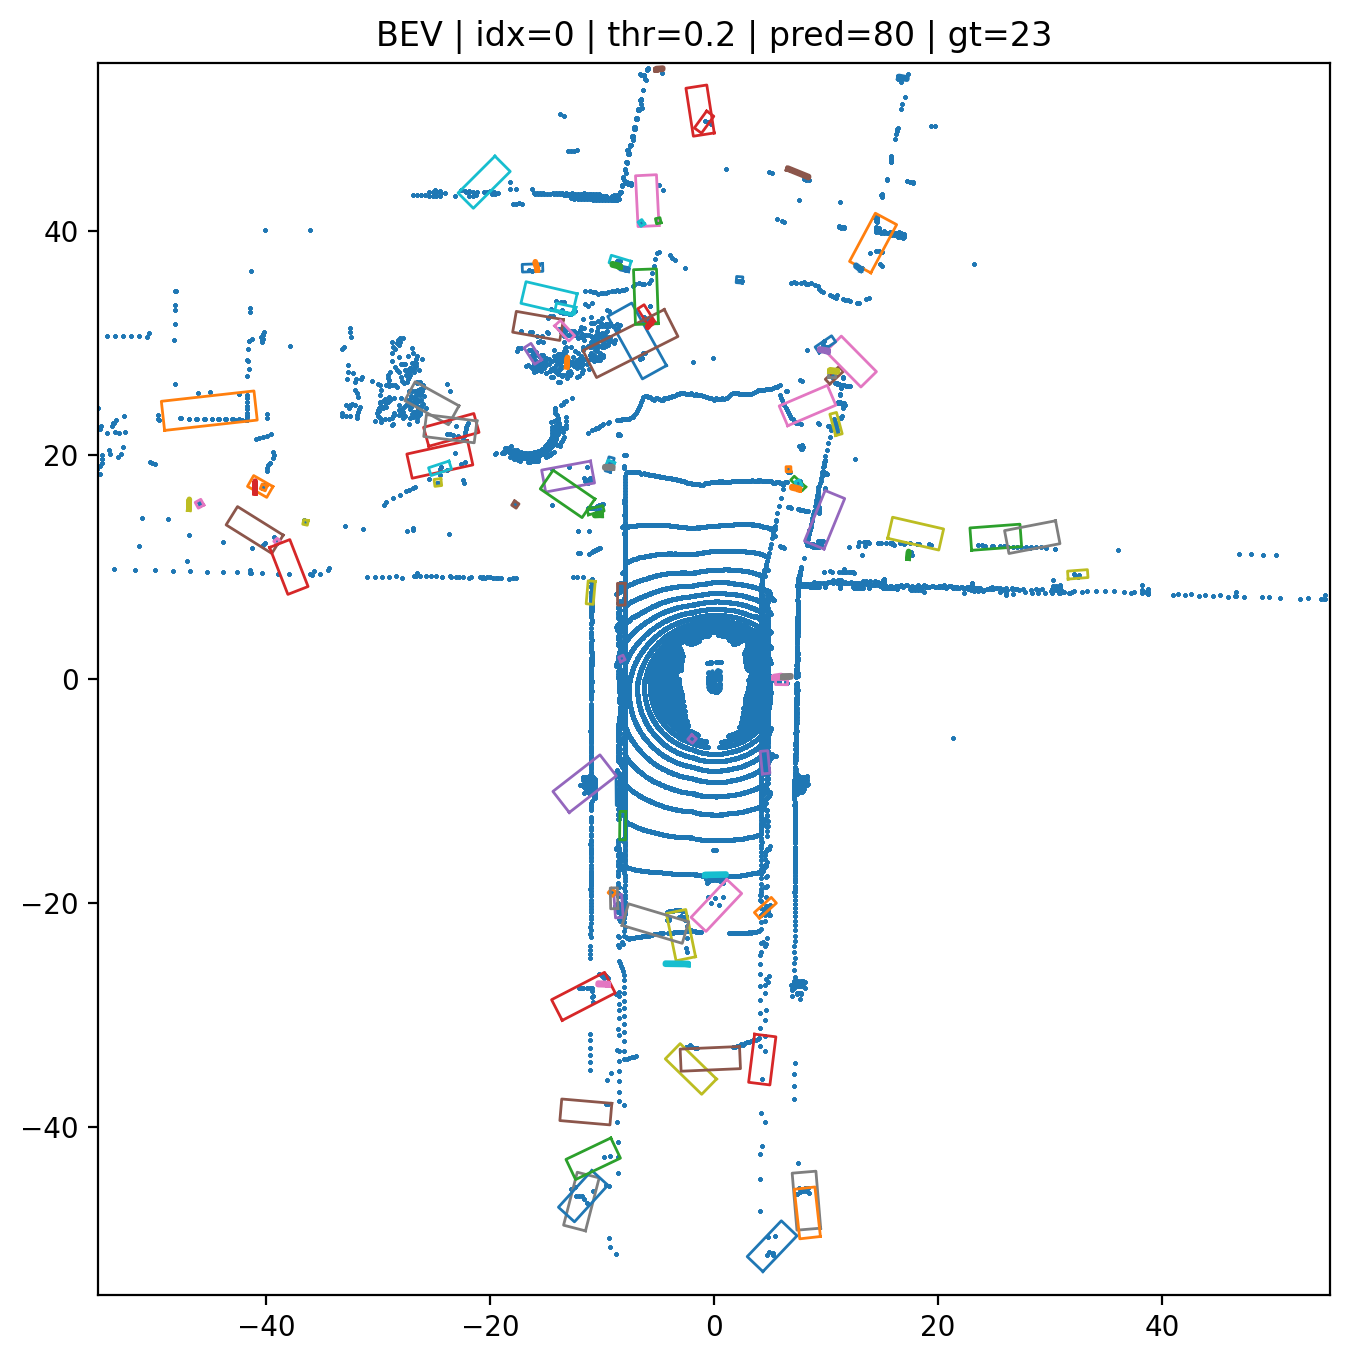

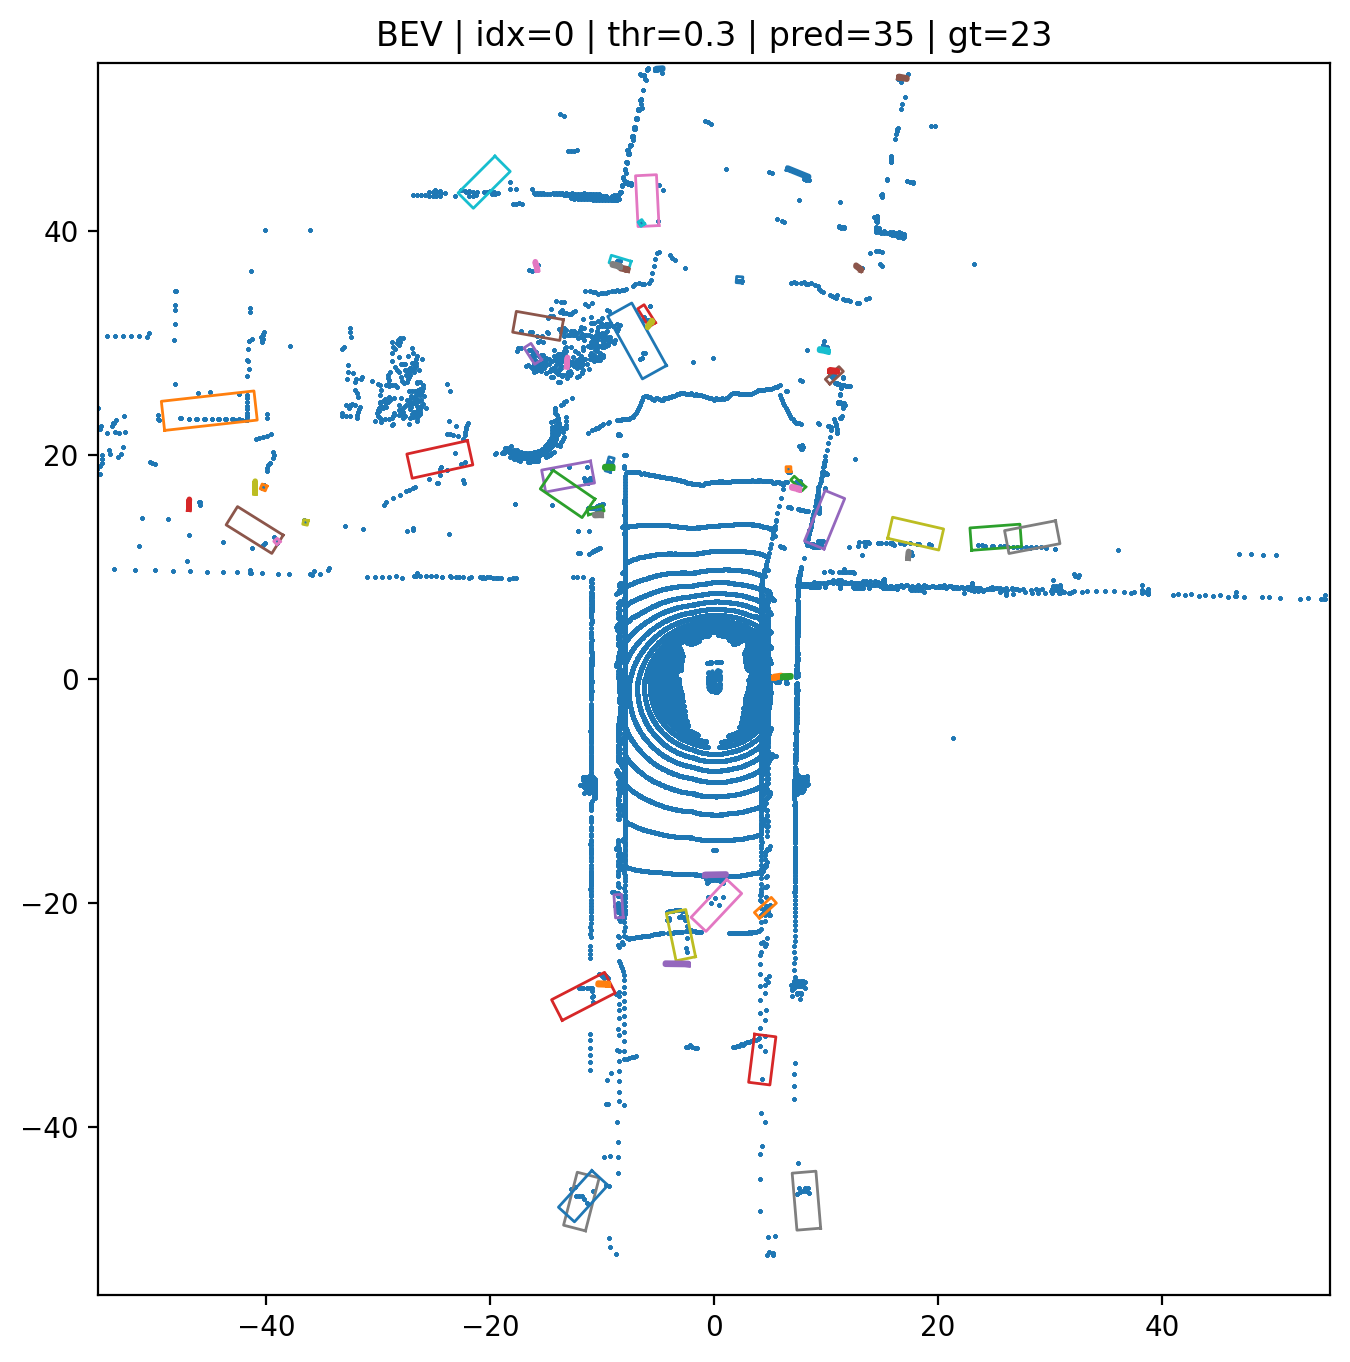

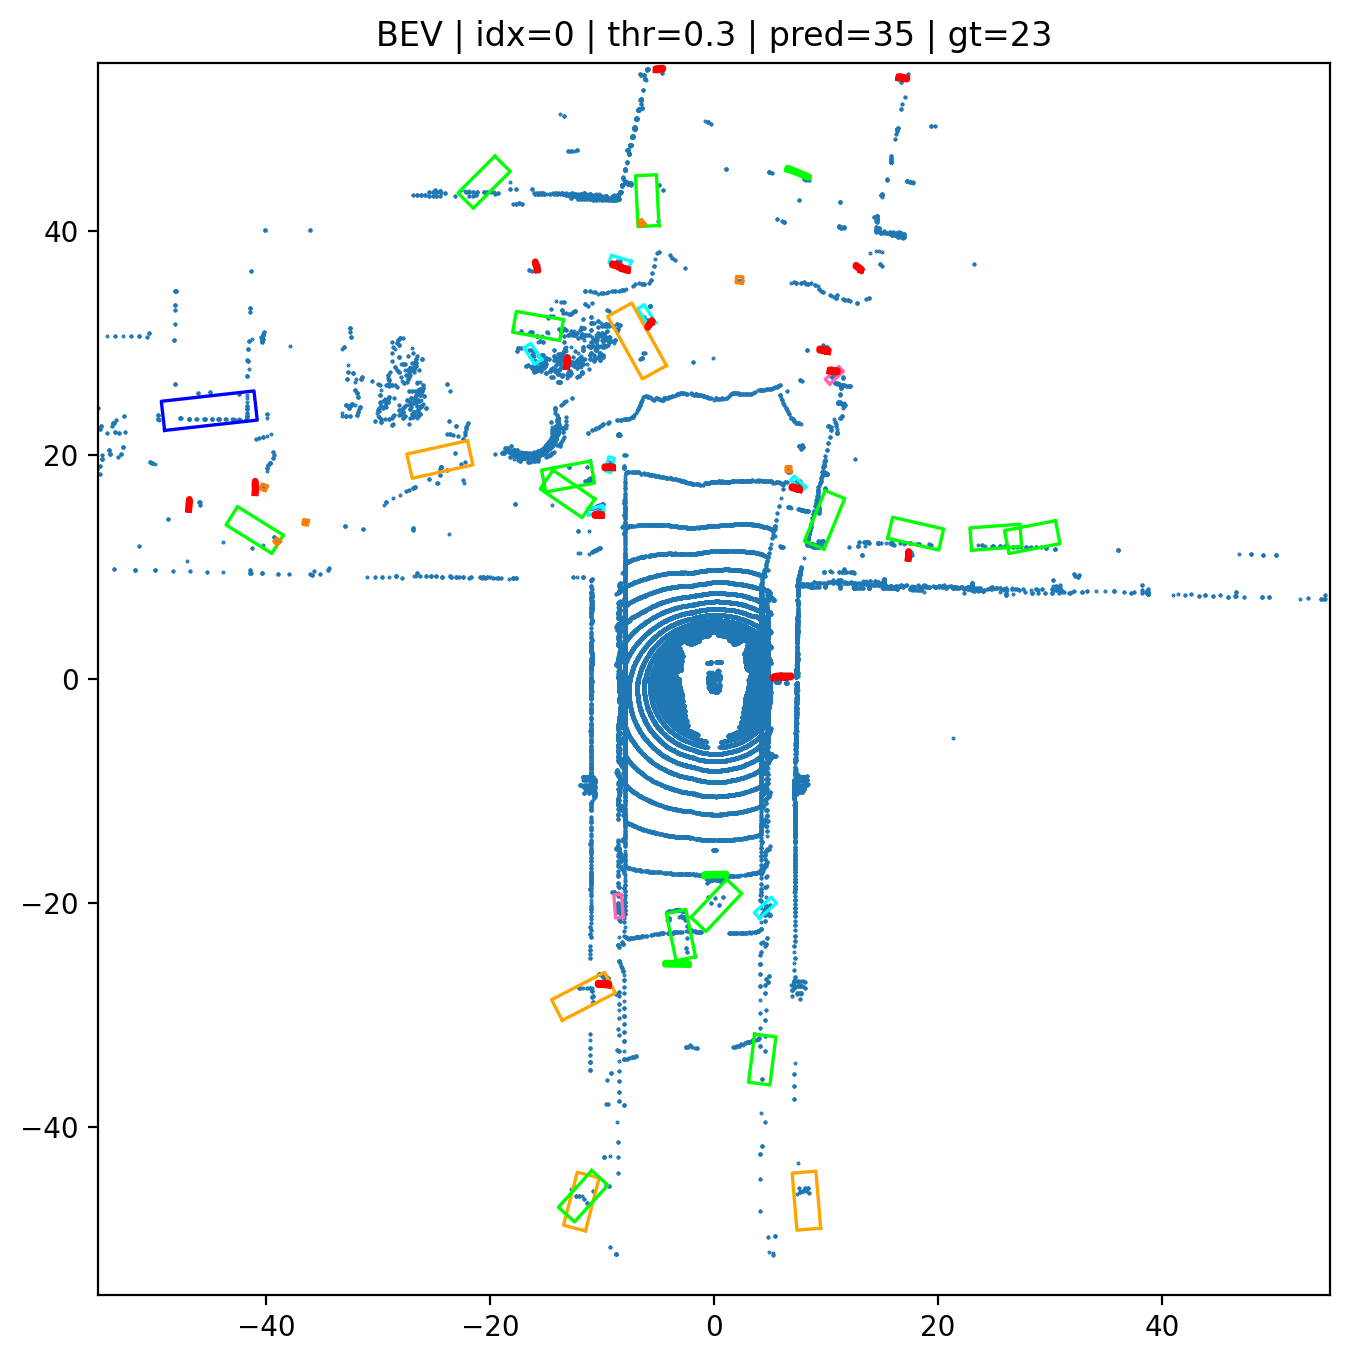

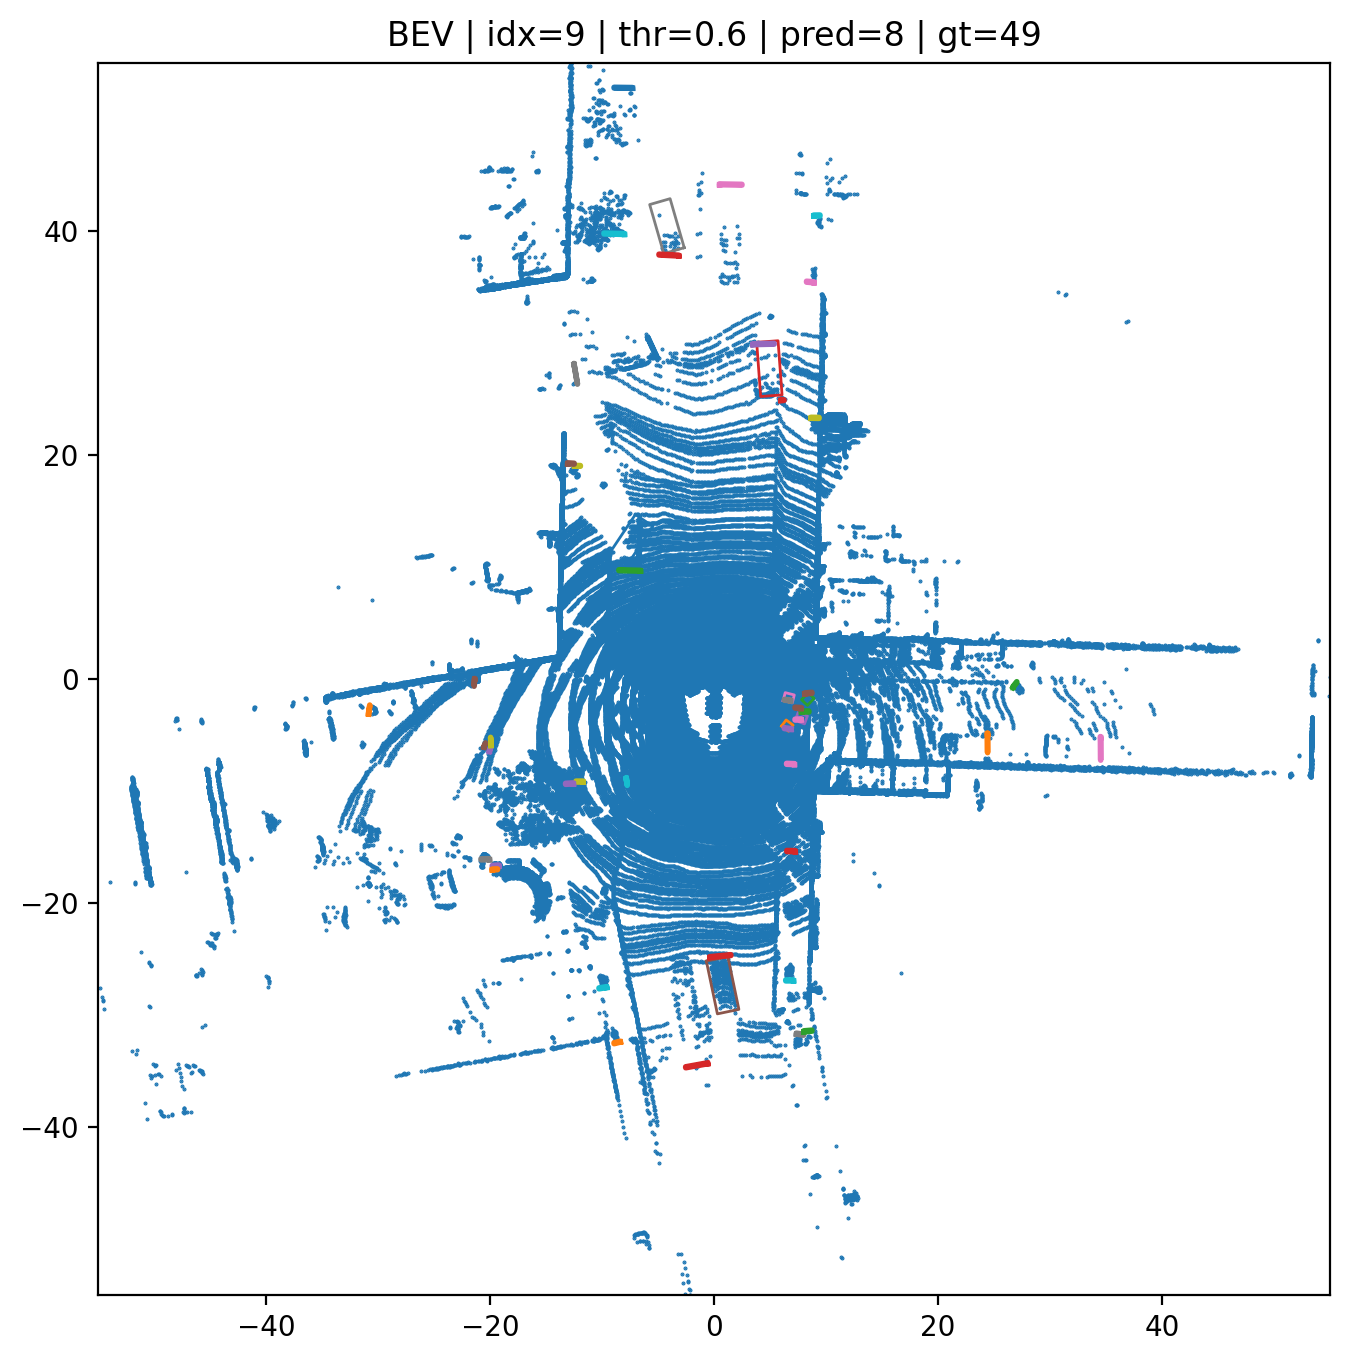

In [ ]:
from PIL import Image
from IPython.display import display
import glob

files = sorted(glob.glob("/content/mmdetection3d/vis_results/bev_idx*.png"))
print("found:", len(files))
display(Image.open(files[0]))
display(Image.open(files[1]))
display(Image.open(files[2]))
display(Image.open(files[-1]))


In [ ]:
%%bash
set -e
source /content/conda/bin/activate openmmlab
cd /content/mmdetection3d
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
export NUMBA_DISABLE_CUDA=1
PY=/content/conda/envs/openmmlab/bin/python

$PY << 'EOF'
import os, glob, warnings
import numpy as np
import torch

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

from mmengine.config import Config
from mmengine.logging import MMLogger
from mmengine.registry import init_default_scope
from mmengine.dataset import default_collate

from mmdet3d.apis import init_model
from mmdet3d.registry import DATASETS

from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
from nuscenes.utils.geometry_utils import view_points
from pyquaternion import Quaternion
import cv2

# -------------------------
# 설정
# -------------------------
CFG_FILE = "configs/centerpoint/centerpoint_pillar02_second_secfpn_8xb4-cyclic-20e_nus-3d.py"
WORK_DIR = "/content/mmdetection3d/work_dirs/centerpoint_l4"
DATA_ROOT = "/content/mmdetection3d/data/nuscenes"

# ⚠️ 너 데이터가 mini면 v1.0-mini, full이면 v1.0-trainval 로 바꿔
VERSION = "v1.0-mini"

OUT_DIR = "/content/mmdetection3d/vis_results"
os.makedirs(OUT_DIR, exist_ok=True)

NUM_SAMPLES = 10         # 몇 샘플 저장할지
SCORE_THR = 0.30
MAX_BOXES = 120
RANGE_XY = 55.0

# LiDAR point -> image overlay 옵션
POINT_ALPHA = 0.65
POINT_SIZE = 2           # 1~3 추천
MAX_LIDAR_POINTS = 60000 # 너무 많으면 느려짐
DEPTH_MIN = 1.0          # 카메라 앞 1m 이상만
DEPTH_MAX = 80.0         # 80m 이내만

CAMS = ["CAM_FRONT","CAM_FRONT_LEFT","CAM_FRONT_RIGHT","CAM_BACK","CAM_BACK_LEFT","CAM_BACK_RIGHT"]

# -------------------------
# 로그/경고 줄이기
# -------------------------
logger = MMLogger.get_instance('mmengine')
logger.setLevel('ERROR')
warnings.filterwarnings("ignore", message="To copy construct from a tensor*")
warnings.filterwarnings("ignore", category=UserWarning)
init_default_scope("mmdet3d")

# -------------------------
# CKPT 자동 선택
# -------------------------
ckpts = sorted(glob.glob(os.path.join(WORK_DIR, "*.pth")))
assert ckpts, f"No .pth in {WORK_DIR}"
CKPT = ckpts[-1]

# -------------------------
# cfg / dataset / model
# -------------------------
cfg = Config.fromfile(CFG_FILE)
cfg.load_from = CKPT

cfg.test_dataloader.dataset.data_root = DATA_ROOT
cfg.test_dataloader.dataset.ann_file = "nuscenes_infos_val.pkl"
dataset = DATASETS.build(cfg.test_dataloader.dataset)

model = init_model(cfg, CKPT, device="cuda:0")
model.eval()

# nuScenes API
nusc = NuScenes(version=VERSION, dataroot=DATA_ROOT, verbose=False)

# -------------------------
# 클래스/색 정의
# -------------------------
# CenterPoint nuScenes 일반 10클래스
DET_CLASSES = [
    "car","truck","construction_vehicle","bus","trailer","barrier",
    "motorcycle","bicycle","pedestrian","traffic_cone"
]

# 클래스별 BGR 색 (OpenCV 기준)
CLASS_COLOR = {
    "car": (0,255,0),
    "truck": (0,165,255),
    "construction_vehicle": (0,255,255),
    "bus": (255,0,0),
    "trailer": (255,0,255),
    "barrier": (128,128,0),
    "motorcycle": (255,255,0),
    "bicycle": (180,105,255),
    "pedestrian": (0,0,255),
    "traffic_cone": (0,128,255),
    "unknown": (200,200,200),
}

# nuScenes category_name -> DET_CLASSES 매핑(핵심만)
def map_nusc_category_to_det(cat: str) -> str:
    c = cat.lower()
    if c.startswith("vehicle.car"): return "car"
    if c.startswith("vehicle.truck"): return "truck"
    if c.startswith("vehicle.bus"): return "bus"
    if c.startswith("vehicle.trailer"): return "trailer"
    if c.startswith("vehicle.construction"): return "construction_vehicle"
    if c.startswith("movable_object.barrier"): return "barrier"
    if c.startswith("movable_object.trafficcone"): return "traffic_cone"
    if c.startswith("human.pedestrian"): return "pedestrian"
    if c.startswith("vehicle.motorcycle"): return "motorcycle"
    if c.startswith("vehicle.bicycle") or c.startswith("human.pedestrian.bicycle"): return "bicycle"
    # nuScenes에는 bicycle이 vehicle.bicycle로 들어오는 경우가 일반적
    return "unknown"

def yaw_to_rot2(yaw: float) -> np.ndarray:
    c, s = np.cos(yaw), np.sin(yaw)
    return np.array([[c, -s],[s, c]], dtype=np.float32)

def box_bev_corners(x, y, dx, dy, yaw):
    local = np.array([[ dx/2,  dy/2],
                      [ dx/2, -dy/2],
                      [-dx/2, -dy/2],
                      [-dx/2,  dy/2]], dtype=np.float32)
    R = yaw_to_rot2(yaw)
    return (local @ R.T) + np.array([x, y], dtype=np.float32)

def get_sample_token_from_mmdet3d(info: dict) -> str:
    if "token" in info:
        return info["token"]
    raise KeyError("Cannot find sample token in dataset info. Keys: " + str(list(info.keys())))

def lidar_pred_to_boxes_with_class(boxes_tensor, scores, labels, score_thr):
    keep = np.where(scores >= score_thr)[0]
    out = []
    for i in keep:
        x,y,z,dx,dy,dz,yaw = boxes_tensor[i,0],boxes_tensor[i,1],boxes_tensor[i,2],boxes_tensor[i,3],boxes_tensor[i,4],boxes_tensor[i,5],boxes_tensor[i,6]
        cls = DET_CLASSES[int(labels[i])] if int(labels[i]) < len(DET_CLASSES) else "unknown"
        q = Quaternion(axis=[0,0,1], angle=float(yaw))
        out.append((Box(center=[float(x),float(y),float(z)],
                        size=[float(dx),float(dy),float(dz)],
                        orientation=q),
                    cls,
                    float(scores[i])))
    return out

def transform_box_lidar_to_cam(nusc, box_lidar: Box, lidar_sd_token: str, cam_sd_token: str) -> Box:
    box = box_lidar.copy()

    lidar_sd = nusc.get("sample_data", lidar_sd_token)
    lidar_calib = nusc.get("calibrated_sensor", lidar_sd["calibrated_sensor_token"])
    lidar_pose  = nusc.get("ego_pose", lidar_sd["ego_pose_token"])

    cam_sd = nusc.get("sample_data", cam_sd_token)
    cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
    cam_pose  = nusc.get("ego_pose", cam_sd["ego_pose_token"])

    # lidar -> ego(lidar)
    box.rotate(Quaternion(lidar_calib["rotation"]))
    box.translate(np.array(lidar_calib["translation"]))

    # ego(lidar) -> global
    box.rotate(Quaternion(lidar_pose["rotation"]))
    box.translate(np.array(lidar_pose["translation"]))

    # global -> ego(cam)
    box.translate(-np.array(cam_pose["translation"]))
    box.rotate(Quaternion(cam_pose["rotation"]).inverse)

    # ego -> cam
    box.translate(-np.array(cam_calib["translation"]))
    box.rotate(Quaternion(cam_calib["rotation"]).inverse)

    return box

def transform_points_lidar_to_cam(nusc, pts_lidar_xyz: np.ndarray, lidar_sd_token: str, cam_sd_token: str) -> np.ndarray:
    """
    pts_lidar_xyz: (N,3) in LIDAR_TOP
    return: (N,3) in camera frame
    """
    lidar_sd = nusc.get("sample_data", lidar_sd_token)
    lidar_calib = nusc.get("calibrated_sensor", lidar_sd["calibrated_sensor_token"])
    lidar_pose  = nusc.get("ego_pose", lidar_sd["ego_pose_token"])

    cam_sd = nusc.get("sample_data", cam_sd_token)
    cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
    cam_pose  = nusc.get("ego_pose", cam_sd["ego_pose_token"])

    pts = pts_lidar_xyz.copy()

    # lidar -> ego(lidar time)
    pts = (Quaternion(lidar_calib["rotation"]).rotation_matrix @ pts.T).T + np.array(lidar_calib["translation"])

    # ego -> global
    pts = (Quaternion(lidar_pose["rotation"]).rotation_matrix @ pts.T).T + np.array(lidar_pose["translation"])

    # global -> ego(cam time)
    pts = pts - np.array(cam_pose["translation"])
    pts = (Quaternion(cam_pose["rotation"]).inverse.rotation_matrix @ pts.T).T

    # ego -> cam
    pts = pts - np.array(cam_calib["translation"])
    pts = (Quaternion(cam_calib["rotation"]).inverse.rotation_matrix @ pts.T).T

    return pts

def draw_box_on_image(img_bgr, box_cam: Box, cam_intrinsic, color, thickness=2):
    corners = box_cam.corners()
    # camera frame: z가 depth
    if np.all(corners[2, :] <= 0.5):
        return img_bgr

    pts_2d = view_points(corners, np.array(cam_intrinsic), normalize=True)[:2, :].T
    pts_2d = pts_2d.astype(np.int32)

    edges = [
        (0,1),(1,2),(2,3),(3,0),
        (4,5),(5,6),(6,7),(7,4),
        (0,4),(1,5),(2,6),(3,7)
    ]
    h,w = img_bgr.shape[:2]
    for a,b in edges:
        x1,y1 = pts_2d[a]
        x2,y2 = pts_2d[b]
        # 너무 바깥인 건 스킵
        if (x1<-2000 or x1> w+2000 or y1<-2000 or y1> h+2000 or
            x2<-2000 or x2> w+2000 or y2<-2000 or y2> h+2000):
            continue
        cv2.line(img_bgr, (x1,y1), (x2,y2), color, thickness, lineType=cv2.LINE_AA)
    return img_bgr

def overlay_lidar_points_on_image(img_bgr, pts_cam: np.ndarray, cam_intrinsic, alpha=0.6, size=2):
    """
    pts_cam: (N,3) camera frame
    depth 기반 컬러맵으로 포인트 오버레이
    """
    h,w = img_bgr.shape[:2]

    z = pts_cam[:,2]
    mask = (z > DEPTH_MIN) & (z < DEPTH_MAX)
    pts_cam = pts_cam[mask]
    z = z[mask]
    if pts_cam.shape[0] == 0:
        return img_bgr

    # project
    pts_2d = (np.array(cam_intrinsic) @ pts_cam.T).T  # (N,3)
    u = pts_2d[:,0] / pts_2d[:,2]
    v = pts_2d[:,1] / pts_2d[:,2]

    mask2 = (u>=0) & (u<w) & (v>=0) & (v<h)
    u = u[mask2].astype(np.int32)
    v = v[mask2].astype(np.int32)
    z = z[mask2]

    if u.size == 0:
        return img_bgr

    # depth -> color (near=red, far=blue) : OpenCV colormap
    zn = (z - DEPTH_MIN) / (DEPTH_MAX - DEPTH_MIN + 1e-6)
    zn = np.clip(zn, 0, 1)
    zn255 = (zn*255).astype(np.uint8)
    colors = cv2.applyColorMap(zn255, cv2.COLORMAP_JET)  # (N,1,3) BGR

    overlay = img_bgr.copy()
    for i in range(u.size):
        cv2.circle(overlay, (u[i], v[i]), size, tuple(int(x) for x in colors[i,0]), -1, lineType=cv2.LINE_AA)

    return cv2.addWeighted(overlay, alpha, img_bgr, 1-alpha, 0)

# -------------------------
# 메인 루프
# -------------------------
for idx in range(min(NUM_SAMPLES, len(dataset))):
    sample = dataset[idx]
    info = dataset.get_data_info(idx) if hasattr(dataset, "get_data_info") else {}
    sample_token = get_sample_token_from_mmdet3d(info)
    nusc_sample = nusc.get("sample", sample_token)

    lidar_sd_token = nusc_sample["data"]["LIDAR_TOP"]

    # ----- inference -----
    with torch.no_grad():
        batch = default_collate([sample])
        batch = model.data_preprocessor(batch, False)
        out = model.test_step(batch)[0]

    pi3d = out.pred_instances_3d
    scores = pi3d.scores_3d.detach().cpu().numpy()
    labels = pi3d.labels_3d.detach().cpu().numpy()
    boxes_tensor = pi3d.bboxes_3d.tensor.detach().cpu().numpy()

    pred_items = lidar_pred_to_boxes_with_class(boxes_tensor, scores, labels, SCORE_THR)
    pred_items = sorted(pred_items, key=lambda x: x[2], reverse=True)[:MAX_BOXES]

    # ----- GT: global boxes + class -----
    gt_items_global = []
    for ann_token in nusc_sample["anns"]:
        ann = nusc.get("sample_annotation", ann_token)
        cls = map_nusc_category_to_det(ann["category_name"])
        if cls == "unknown":  # 평가 클래스 밖은 제외(원하면 살려도 됨)
            continue
        gt_items_global.append((
            Box(center=ann["translation"], size=ann["size"], orientation=Quaternion(ann["rotation"])),
            cls
        ))

    # ----- GT: global -> lidar (for BEV overlay) -----
    lidar_sd = nusc.get("sample_data", lidar_sd_token)
    lidar_calib = nusc.get("calibrated_sensor", lidar_sd["calibrated_sensor_token"])
    lidar_pose  = nusc.get("ego_pose", lidar_sd["ego_pose_token"])

    gt_items_lidar = []
    for b, cls in gt_items_global:
        bb = b.copy()
        bb.translate(-np.array(lidar_pose["translation"]))
        bb.rotate(Quaternion(lidar_pose["rotation"]).inverse)
        bb.translate(-np.array(lidar_calib["translation"]))
        bb.rotate(Quaternion(lidar_calib["rotation"]).inverse)
        gt_items_lidar.append((bb, cls))

    # ----- BEV plot (points + pred + gt) -----
    pts = sample["inputs"]["points"]
    pts_np = pts.cpu().numpy() if hasattr(pts, "cpu") else np.asarray(pts)
    if pts_np.shape[0] > MAX_LIDAR_POINTS:
        sel = np.random.choice(pts_np.shape[0], MAX_LIDAR_POINTS, replace=False)
        pts_np_vis = pts_np[sel]
    else:
        pts_np_vis = pts_np

    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.scatter(pts_np_vis[:,0], pts_np_vis[:,1], s=0.2)

    # pred boxes (class color)
    for (b, cls, sc) in pred_items:
        x,y,z = b.center
        dx,dy,dz = b.wlh  # Box에서는 wlh로 나옴 (주의: size ordering은 nuScenes Box 기준)
        # 여기서 b는 lidar frame에서 만든 Box라 wlh는 (w,l,h)로 저장됨.
        # CenterPoint tensor는 (dx,dy,dz)였고 Box(size=[dx,dy,dz])로 넣었으니
        # b.wlh = [dx,dy,dz] 그대로라고 보면 됨.
        yaw = b.orientation.yaw_pitch_roll[0]
        corners = box_bev_corners(x, y, dx, dy, yaw)
        poly = np.vstack([corners, corners[0:1]])
        c = CLASS_COLOR.get(cls, CLASS_COLOR["unknown"])
        # matplotlib는 RGB라 변환
        ax.plot(poly[:,0], poly[:,1], linewidth=1.2, color=(c[2]/255, c[1]/255, c[0]/255))

    # gt boxes (class color + 두껍게)
    for (b, cls) in gt_items_lidar:
        c2 = b.corners()[:2,:].T
        base = c2[[0,1,2,3], :]
        poly = np.vstack([base, base[0:1]])
        c = CLASS_COLOR.get(cls, CLASS_COLOR["unknown"])
        ax.plot(poly[:,0], poly[:,1], linewidth=2.4, color=(c[2]/255, c[1]/255, c[0]/255))

    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim([-RANGE_XY, RANGE_XY])
    ax.set_ylim([-RANGE_XY, RANGE_XY])
    ax.set_title(f"BEV | idx={idx} | thr={SCORE_THR} | pred={len(pred_items)} | gt={len(gt_items_lidar)}")

    bev_path = os.path.join(OUT_DIR, f"bev_idx{idx:03d}_thr{SCORE_THR}_classcolor.png")
    plt.savefig(bev_path, dpi=200, bbox_inches="tight")
    plt.close(fig)

    # ----- 6 cameras loop: (a) raw+lidar pts (b) raw+pts+boxes (pred+gt classcolor) -----
    for cam in CAMS:
        cam_sd_token = nusc_sample["data"][cam]
        cam_sd = nusc.get("sample_data", cam_sd_token)
        cam_path = os.path.join(DATA_ROOT, cam_sd["filename"])
        img0 = cv2.imread(cam_path)
        if img0 is None:
            print(f"⚠️ cannot read {cam_path}")
            continue

        cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
        cam_intrinsic = cam_calib["camera_intrinsic"]

        # (3) LiDAR points -> CAM frame -> overlay
        pts_xyz = pts_np[:, :3]
        if pts_xyz.shape[0] > MAX_LIDAR_POINTS:
            sel = np.random.choice(pts_xyz.shape[0], MAX_LIDAR_POINTS, replace=False)
            pts_xyz = pts_xyz[sel]

        pts_cam = transform_points_lidar_to_cam(nusc, pts_xyz, lidar_sd_token, cam_sd_token)

        img_pts = overlay_lidar_points_on_image(img0.copy(), pts_cam, cam_intrinsic, alpha=POINT_ALPHA, size=POINT_SIZE)

        # (2) GT + Pred 3D boxes (class color)
        img_full = img_pts.copy()

        # pred: lidar -> cam
        for (b_lidar, cls, sc) in pred_items:
            b_cam = transform_box_lidar_to_cam(nusc, b_lidar, lidar_sd_token, cam_sd_token)
            img_full = draw_box_on_image(img_full, b_cam, cam_intrinsic, CLASS_COLOR.get(cls, CLASS_COLOR["unknown"]), thickness=2)

        # gt: global -> cam
        cam_pose = nusc.get("ego_pose", cam_sd["ego_pose_token"])
        for (b_glb, cls) in gt_items_global:
            bb = b_glb.copy()
            bb.translate(-np.array(cam_pose["translation"]))
            bb.rotate(Quaternion(cam_pose["rotation"]).inverse)
            bb.translate(-np.array(cam_calib["translation"]))
            bb.rotate(Quaternion(cam_calib["rotation"]).inverse)
            # GT는 더 두껍게
            img_full = draw_box_on_image(img_full, bb, cam_intrinsic, CLASS_COLOR.get(cls, CLASS_COLOR["unknown"]), thickness=3)

        # 저장
        out_pts = os.path.join(OUT_DIR, f"cam_{cam}_idx{idx:03d}_pts.png")
        out_full = os.path.join(OUT_DIR, f"cam_{cam}_idx{idx:03d}_pts_pred_gt.png")
        cv2.imwrite(out_pts, img_pts)
        cv2.imwrite(out_full, img_full)

    print(f"✅ idx={idx} saved BEV + 6CAM overlays")

print("✅ done. outputs in:", OUT_DIR)
EOF


Loads checkpoint by local backend from path: /content/mmdetection3d/work_dirs/centerpoint_l4/epoch_20.pth
✅ idx=0 saved BEV + 6CAM overlays
✅ idx=1 saved BEV + 6CAM overlays
✅ idx=2 saved BEV + 6CAM overlays
✅ idx=3 saved BEV + 6CAM overlays
✅ idx=4 saved BEV + 6CAM overlays
✅ idx=5 saved BEV + 6CAM overlays
✅ idx=6 saved BEV + 6CAM overlays
✅ idx=7 saved BEV + 6CAM overlays
✅ idx=8 saved BEV + 6CAM overlays
✅ idx=9 saved BEV + 6CAM overlays
✅ done. outputs in: /content/mmdetection3d/vis_results


In [ ]:
import glob
files = sorted(glob.glob("/content/mmdetection3d/vis_results/cam_*_idx000_pts_pred_gt.png"))
print("idx000 cam files:", len(files))
for f in files:
    print(f)


idx000 cam files: 6
/content/mmdetection3d/vis_results/cam_CAM_BACK_LEFT_idx000_pts_pred_gt.png
/content/mmdetection3d/vis_results/cam_CAM_BACK_RIGHT_idx000_pts_pred_gt.png
/content/mmdetection3d/vis_results/cam_CAM_BACK_idx000_pts_pred_gt.png
/content/mmdetection3d/vis_results/cam_CAM_FRONT_LEFT_idx000_pts_pred_gt.png
/content/mmdetection3d/vis_results/cam_CAM_FRONT_RIGHT_idx000_pts_pred_gt.png
/content/mmdetection3d/vis_results/cam_CAM_FRONT_idx000_pts_pred_gt.png


In [ ]:
%%bash
set -e
source /content/conda/bin/activate openmmlab
cd /content/mmdetection3d
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
export NUMBA_DISABLE_CUDA=1
PY=/content/conda/envs/openmmlab/bin/python

$PY << 'EOF'
import os, glob, warnings
import numpy as np
import torch

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

from mmengine.config import Config
from mmengine.registry import init_default_scope
from mmengine.dataset import default_collate
from mmdet3d.apis import init_model
from mmdet3d.registry import DATASETS

from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
from nuscenes.utils.geometry_utils import view_points
from pyquaternion import Quaternion
import cv2

# =========================
# 사용자 설정
# =========================
CFG_FILE = "configs/centerpoint/centerpoint_pillar02_second_secfpn_8xb4-cyclic-20e_nus-3d.py"
WORK_DIR = "/content/mmdetection3d/work_dirs/centerpoint_l4"
DATA_ROOT = "/content/mmdetection3d/data/nuscenes"
VERSION  = "v1.0-mini"  # 필요시 v1.0-trainval

OUT_DIR  = "/content/mmdetection3d/vis_results"
os.makedirs(OUT_DIR, exist_ok=True)

IDX = 1                 # 보고 싶은 샘플 index
SCORE_THR = 0.30
MAX_PRED_BOXES = 120
RANGE_XY = 55.0

# (B) 클래스 토글: None이면 전체. 예: ["car","pedestrian"] 로 바꾸면 그 클래스만.
FILTER_CLASSES = None
# FILTER_CLASSES = ["car","pedestrian"]

# (A) Auto-tune 후보군
DEPTH_MAX_CAND = [40.0, 60.0, 80.0, 100.0]
TARGET_PTS_ON_IMAGE = 14000  # "보기 좋은" 목표 포인트 수(대략)

DEPTH_MIN = 1.0
MAX_LIDAR_POINTS = 70000

# (C) 카메라들
CAMS = ["CAM_FRONT","CAM_FRONT_LEFT","CAM_FRONT_RIGHT","CAM_BACK","CAM_BACK_LEFT","CAM_BACK_RIGHT"]

# =========================
# 경고 억제
# =========================
warnings.filterwarnings("ignore", message="To copy construct from a tensor*")
warnings.filterwarnings("ignore", category=UserWarning)
init_default_scope("mmdet3d")

# =========================
# CKPT 자동 선택
# =========================
ckpts = sorted(glob.glob(os.path.join(WORK_DIR, "*.pth")))
assert ckpts, f"No .pth in {WORK_DIR}"
CKPT = ckpts[-1]

# =========================
# cfg / dataset / model
# =========================
cfg = Config.fromfile(CFG_FILE)
cfg.load_from = CKPT
cfg.test_dataloader.dataset.data_root = DATA_ROOT
cfg.test_dataloader.dataset.ann_file = "nuscenes_infos_val.pkl"

dataset = DATASETS.build(cfg.test_dataloader.dataset)
model = init_model(cfg, CKPT, device="cuda:0")
model.eval()

nusc = NuScenes(version=VERSION, dataroot=DATA_ROOT, verbose=False)

# =========================
# 클래스/색
# =========================
DET_CLASSES = [
    "car","truck","construction_vehicle","bus","trailer","barrier",
    "motorcycle","bicycle","pedestrian","traffic_cone"
]
CLASS_COLOR = {
    "car": (0,255,0),
    "truck": (0,165,255),
    "construction_vehicle": (0,255,255),
    "bus": (255,0,0),
    "trailer": (255,0,255),
    "barrier": (128,128,0),
    "motorcycle": (255,255,0),
    "bicycle": (180,105,255),
    "pedestrian": (0,0,255),
    "traffic_cone": (0,128,255),
    "unknown": (200,200,200),
}

def map_nusc_category_to_det(cat: str) -> str:
    c = cat.lower()
    if c.startswith("vehicle.car"): return "car"
    if c.startswith("vehicle.truck"): return "truck"
    if c.startswith("vehicle.bus"): return "bus"
    if c.startswith("vehicle.trailer"): return "trailer"
    if c.startswith("vehicle.construction"): return "construction_vehicle"
    if c.startswith("movable_object.barrier"): return "barrier"
    if c.startswith("movable_object.trafficcone"): return "traffic_cone"
    if c.startswith("human.pedestrian"): return "pedestrian"
    if c.startswith("vehicle.motorcycle"): return "motorcycle"
    if c.startswith("vehicle.bicycle") or c.startswith("human.pedestrian.bicycle"): return "bicycle"
    return "unknown"

def get_sample_token(info: dict) -> str:
    if "token" in info: return info["token"]
    raise KeyError(f"Cannot find sample token. keys={list(info.keys())}")

def yaw_to_rot2(yaw: float) -> np.ndarray:
    c, s = np.cos(yaw), np.sin(yaw)
    return np.array([[c, -s],[s, c]], dtype=np.float32)

def box_bev_corners(x, y, dx, dy, yaw):
    local = np.array([[ dx/2,  dy/2],
                      [ dx/2, -dy/2],
                      [-dx/2, -dy/2],
                      [-dx/2,  dy/2]], dtype=np.float32)
    R = yaw_to_rot2(yaw)
    return (local @ R.T) + np.array([x, y], dtype=np.float32)

def lidar_pred_to_items(pi3d, score_thr):
    scores = pi3d.scores_3d.detach().cpu().numpy()
    labels = pi3d.labels_3d.detach().cpu().numpy()
    boxesT = pi3d.bboxes_3d.tensor.detach().cpu().numpy()
    keep = np.where(scores >= score_thr)[0]
    out = []
    for i in keep:
        x,y,z,dx,dy,dz,yaw = boxesT[i,0],boxesT[i,1],boxesT[i,2],boxesT[i,3],boxesT[i,4],boxesT[i,5],boxesT[i,6]
        cls = DET_CLASSES[int(labels[i])] if int(labels[i]) < len(DET_CLASSES) else "unknown"
        if (FILTER_CLASSES is not None) and (cls not in FILTER_CLASSES):
            continue
        q = Quaternion(axis=[0,0,1], angle=float(yaw))
        out.append((Box(center=[float(x),float(y),float(z)],
                        size=[float(dx),float(dy),float(dz)],
                        orientation=q),
                    cls,
                    float(scores[i])))
    out = sorted(out, key=lambda x: x[2], reverse=True)[:MAX_PRED_BOXES]
    return out

def draw_box_on_image(img_bgr, box_cam: Box, cam_intrinsic, color, thickness=2):
    corners = box_cam.corners()
    if np.all(corners[2, :] <= 0.5):
        return img_bgr
    pts_2d = view_points(corners, np.array(cam_intrinsic), normalize=True)[:2, :].T.astype(np.int32)
    edges = [(0,1),(1,2),(2,3),(3,0),(4,5),(5,6),(6,7),(7,4),(0,4),(1,5),(2,6),(3,7)]
    h,w = img_bgr.shape[:2]
    for a,b in edges:
        x1,y1 = pts_2d[a]
        x2,y2 = pts_2d[b]
        if (x1<-2000 or x1>w+2000 or y1<-2000 or y1>h+2000 or x2<-2000 or x2>w+2000 or y2<-2000 or y2>h+2000):
            continue
        cv2.line(img_bgr, (x1,y1), (x2,y2), color, thickness, lineType=cv2.LINE_AA)
    return img_bgr

def transform_box_lidar_to_cam(nusc, box_lidar: Box, lidar_sd_token: str, cam_sd_token: str) -> Box:
    box = box_lidar.copy()

    lidar_sd = nusc.get("sample_data", lidar_sd_token)
    lidar_calib = nusc.get("calibrated_sensor", lidar_sd["calibrated_sensor_token"])
    lidar_pose  = nusc.get("ego_pose", lidar_sd["ego_pose_token"])

    cam_sd = nusc.get("sample_data", cam_sd_token)
    cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
    cam_pose  = nusc.get("ego_pose", cam_sd["ego_pose_token"])

    box.rotate(Quaternion(lidar_calib["rotation"]))
    box.translate(np.array(lidar_calib["translation"]))

    box.rotate(Quaternion(lidar_pose["rotation"]))
    box.translate(np.array(lidar_pose["translation"]))

    box.translate(-np.array(cam_pose["translation"]))
    box.rotate(Quaternion(cam_pose["rotation"]).inverse)

    box.translate(-np.array(cam_calib["translation"]))
    box.rotate(Quaternion(cam_calib["rotation"]).inverse)
    return box

def transform_points_lidar_to_cam(nusc, pts_lidar_xyz: np.ndarray, lidar_sd_token: str, cam_sd_token: str) -> np.ndarray:
    lidar_sd = nusc.get("sample_data", lidar_sd_token)
    lidar_calib = nusc.get("calibrated_sensor", lidar_sd["calibrated_sensor_token"])
    lidar_pose  = nusc.get("ego_pose", lidar_sd["ego_pose_token"])

    cam_sd = nusc.get("sample_data", cam_sd_token)
    cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
    cam_pose  = nusc.get("ego_pose", cam_sd["ego_pose_token"])

    pts = pts_lidar_xyz.copy()
    pts = (Quaternion(lidar_calib["rotation"]).rotation_matrix @ pts.T).T + np.array(lidar_calib["translation"])
    pts = (Quaternion(lidar_pose["rotation"]).rotation_matrix @ pts.T).T + np.array(lidar_pose["translation"])
    pts = pts - np.array(cam_pose["translation"])
    pts = (Quaternion(cam_pose["rotation"]).inverse.rotation_matrix @ pts.T).T
    pts = pts - np.array(cam_calib["translation"])
    pts = (Quaternion(cam_calib["rotation"]).inverse.rotation_matrix @ pts.T).T
    return pts

def count_projected_points(img_shape_hw, pts_cam, cam_intrinsic, depth_max):
    h,w = img_shape_hw
    z = pts_cam[:,2]
    mask = (z > DEPTH_MIN) & (z < depth_max)
    pts = pts_cam[mask]
    if pts.shape[0] == 0:
        return 0
    proj = (np.array(cam_intrinsic) @ pts.T).T
    u = proj[:,0] / proj[:,2]
    v = proj[:,1] / proj[:,2]
    m2 = (u>=0)&(u<w)&(v>=0)&(v<h)
    return int(np.count_nonzero(m2))

def auto_tune(depth_counts_avg):
    # depth_max: 목표 포인트 수에 가장 가까운 후보 선택
    best = None
    best_err = 1e18
    for dmax, cnt in depth_counts_avg.items():
        err = abs(cnt - TARGET_PTS_ON_IMAGE)
        if err < best_err:
            best_err = err
            best = dmax

    # cnt 기반 alpha/size 선택 (많으면 더 옅고 작게)
    cnt = depth_counts_avg[best]
    if cnt >= 25000:
        alpha, size = 0.40, 1
    elif cnt >= 16000:
        alpha, size = 0.50, 2
    elif cnt >= 8000:
        alpha, size = 0.65, 2
    else:
        alpha, size = 0.80, 3
    return float(best), float(alpha), int(size)

def overlay_lidar_points(img_bgr, pts_cam, cam_intrinsic, depth_max, alpha, size):
    h,w = img_bgr.shape[:2]
    z = pts_cam[:,2]
    mask = (z > DEPTH_MIN) & (z < depth_max)
    pts = pts_cam[mask]
    if pts.shape[0] == 0:
        return img_bgr

    proj = (np.array(cam_intrinsic) @ pts.T).T
    u = proj[:,0] / proj[:,2]
    v = proj[:,1] / proj[:,2]
    z = pts[:,2]

    m2 = (u>=0)&(u<w)&(v>=0)&(v<h)
    u = u[m2].astype(np.int32)
    v = v[m2].astype(np.int32)
    z = z[m2]
    if u.size == 0:
        return img_bgr

    zn = (z - DEPTH_MIN) / (depth_max - DEPTH_MIN + 1e-6)
    zn = np.clip(zn, 0, 1)
    zn255 = (zn*255).astype(np.uint8)
    colors = cv2.applyColorMap(zn255, cv2.COLORMAP_JET)

    overlay = img_bgr.copy()
    for i in range(u.size):
        cv2.circle(overlay, (u[i], v[i]), size, tuple(int(x) for x in colors[i,0]), -1, lineType=cv2.LINE_AA)
    return cv2.addWeighted(overlay, alpha, img_bgr, 1-alpha, 0)

def put_label(img, text):
    out = img.copy()
    cv2.rectangle(out, (0,0), (out.shape[1], 38), (0,0,0), -1)
    cv2.putText(out, text, (10,26), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,255,255), 2, cv2.LINE_AA)
    return out

def resize_to_h(img, H):
    h,w = img.shape[:2]
    if h == H: return img
    scale = H / h
    W = int(round(w * scale))
    return cv2.resize(img, (W,H), interpolation=cv2.INTER_AREA)

def make_2x3_grid(imgs6, cam_names):
    assert len(imgs6) == 6
    # 같은 높이로 맞추고 3개씩 가로 결합 후 2줄 세로 결합
    H = min(im.shape[0] for im in imgs6)
    ims = [resize_to_h(im, H) for im in imgs6]

    ims = [put_label(im, cam_names[i]) for i,im in enumerate(ims)]

    row1 = cv2.hconcat(ims[0:3])
    row2 = cv2.hconcat(ims[3:6])
    grid = cv2.vconcat([row1, row2])
    return grid

# =========================
# 데이터 로드 / 추론
# =========================
sample = dataset[IDX]
info = dataset.get_data_info(IDX) if hasattr(dataset, "get_data_info") else {}
sample_token = get_sample_token(info)
nusc_sample = nusc.get("sample", sample_token)

lidar_sd_token = nusc_sample["data"]["LIDAR_TOP"]

with torch.no_grad():
    batch = default_collate([sample])
    batch = model.data_preprocessor(batch, False)
    out = model.test_step(batch)[0]

pred_items = lidar_pred_to_items(out.pred_instances_3d, SCORE_THR)

# GT (global)
gt_items_global = []
for ann_token in nusc_sample["anns"]:
    ann = nusc.get("sample_annotation", ann_token)
    cls = map_nusc_category_to_det(ann["category_name"])
    if cls == "unknown":
        continue
    if (FILTER_CLASSES is not None) and (cls not in FILTER_CLASSES):
        continue
    gt_items_global.append((Box(center=ann["translation"], size=ann["size"], orientation=Quaternion(ann["rotation"])), cls))

# GT global -> LiDAR (BEV용)
lidar_sd = nusc.get("sample_data", lidar_sd_token)
lidar_calib = nusc.get("calibrated_sensor", lidar_sd["calibrated_sensor_token"])
lidar_pose  = nusc.get("ego_pose", lidar_sd["ego_pose_token"])

gt_items_lidar = []
for b, cls in gt_items_global:
    bb = b.copy()
    bb.translate(-np.array(lidar_pose["translation"]))
    bb.rotate(Quaternion(lidar_pose["rotation"]).inverse)
    bb.translate(-np.array(lidar_calib["translation"]))
    bb.rotate(Quaternion(lidar_calib["rotation"]).inverse)
    gt_items_lidar.append((bb, cls))

# LiDAR points
pts = sample["inputs"]["points"]
pts_np = pts.cpu().numpy() if hasattr(pts, "cpu") else np.asarray(pts)
pts_xyz = pts_np[:, :3]
if pts_xyz.shape[0] > MAX_LIDAR_POINTS:
    sel = np.random.choice(pts_xyz.shape[0], MAX_LIDAR_POINTS, replace=False)
    pts_xyz = pts_xyz[sel]
    pts_np_vis = pts_np[sel]
else:
    pts_np_vis = pts_np

# =========================
# (A) Auto-tune: depth_max/alpha/size
# - 모든 CAM에 대해 projected point count 평균을 계산 후 결정
# =========================
depth_counts = {d: [] for d in DEPTH_MAX_CAND}

for cam in CAMS:
    cam_sd_token = nusc_sample["data"][cam]
    cam_sd = nusc.get("sample_data", cam_sd_token)
    img_path = os.path.join(DATA_ROOT, cam_sd["filename"])
    img0 = cv2.imread(img_path)
    if img0 is None:
        continue
    cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
    cam_intrinsic = cam_calib["camera_intrinsic"]
    pts_cam = transform_points_lidar_to_cam(nusc, pts_xyz, lidar_sd_token, cam_sd_token)
    for dmax in DEPTH_MAX_CAND:
        depth_counts[dmax].append(count_projected_points(img0.shape[:2], pts_cam, cam_intrinsic, dmax))

depth_counts_avg = {d: (float(np.mean(v)) if len(v) else 0.0) for d,v in depth_counts.items()}
DEPTH_MAX, POINT_ALPHA, POINT_SIZE = auto_tune(depth_counts_avg)

print("✅ Auto-tuned:",
      "DEPTH_MAX=", DEPTH_MAX,
      "POINT_ALPHA=", POINT_ALPHA,
      "POINT_SIZE=", POINT_SIZE,
      "depth_counts_avg=", {k:int(v) for k,v in depth_counts_avg.items()})

# =========================
# BEV 그림 저장 (Pred/GT 클래스색)
# =========================
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.scatter(pts_np_vis[:,0], pts_np_vis[:,1], s=0.2)

# Pred (얇게)
for (b, cls, sc) in pred_items:
    x,y,z = b.center
    dx,dy,dz = b.wlh
    yaw = b.orientation.yaw_pitch_roll[0]
    corners = box_bev_corners(x, y, dx, dy, yaw)
    poly = np.vstack([corners, corners[0:1]])
    c = CLASS_COLOR.get(cls, CLASS_COLOR["unknown"])
    ax.plot(poly[:,0], poly[:,1], linewidth=1.2, color=(c[2]/255, c[1]/255, c[0]/255))

# GT (두껍게)
for (b, cls) in gt_items_lidar:
    c2 = b.corners()[:2,:].T
    base = c2[[0,1,2,3], :]
    poly = np.vstack([base, base[0:1]])
    c = CLASS_COLOR.get(cls, CLASS_COLOR["unknown"])
    ax.plot(poly[:,0], poly[:,1], linewidth=2.4, color=(c[2]/255, c[1]/255, c[0]/255))

ax.set_aspect("equal", adjustable="box")
ax.set_xlim([-RANGE_XY, RANGE_XY])
ax.set_ylim([-RANGE_XY, RANGE_XY])
ax.set_title(f"BEV | idx={IDX} | thr={SCORE_THR} | pred={len(pred_items)} | gt={len(gt_items_lidar)}")

bev_path = os.path.join(OUT_DIR, f"scene_idx{IDX:03d}_BEV_thr{SCORE_THR}.png")
plt.savefig(bev_path, dpi=220, bbox_inches="tight")
plt.close(fig)

# =========================
# 6 CAM 저장 + (C) 2x3 grid 합치기
# - raw / overlay(pts+pred+gt) 둘 다 만들고,
# - 최종적으로 overlay grid 한 장 저장
# =========================
cam_raw_list = []
cam_overlay_list = []

for cam in CAMS:
    cam_sd_token = nusc_sample["data"][cam]
    cam_sd = nusc.get("sample_data", cam_sd_token)
    img_path = os.path.join(DATA_ROOT, cam_sd["filename"])
    img0 = cv2.imread(img_path)
    if img0 is None:
        # placeholder
        img0 = np.zeros((900,1600,3), dtype=np.uint8)
        img0 = put_label(img0, f"{cam} (missing)")
    else:
        img0 = put_label(img0, cam)

    cam_calib = nusc.get("calibrated_sensor", cam_sd["calibrated_sensor_token"])
    cam_intrinsic = cam_calib["camera_intrinsic"]

    # points overlay
    pts_cam = transform_points_lidar_to_cam(nusc, pts_xyz, lidar_sd_token, cam_sd_token)
    img_pts = overlay_lidar_points(img0.copy(), pts_cam, cam_intrinsic, DEPTH_MAX, POINT_ALPHA, POINT_SIZE)

    # pred boxes
    img_full = img_pts.copy()
    for (b_lidar, cls, sc) in pred_items:
        b_cam = transform_box_lidar_to_cam(nusc, b_lidar, lidar_sd_token, cam_sd_token)
        img_full = draw_box_on_image(img_full, b_cam, cam_intrinsic, CLASS_COLOR.get(cls, CLASS_COLOR["unknown"]), thickness=2)

    # gt boxes (global -> cam)
    cam_pose = nusc.get("ego_pose", cam_sd["ego_pose_token"])
    for (b_glb, cls) in gt_items_global:
        bb = b_glb.copy()
        bb.translate(-np.array(cam_pose["translation"]))
        bb.rotate(Quaternion(cam_pose["rotation"]).inverse)
        bb.translate(-np.array(cam_calib["translation"]))
        bb.rotate(Quaternion(cam_calib["rotation"]).inverse)
        img_full = draw_box_on_image(img_full, bb, cam_intrinsic, CLASS_COLOR.get(cls, CLASS_COLOR["unknown"]), thickness=3)

    raw_out   = os.path.join(OUT_DIR, f"scene_idx{IDX:03d}_{cam}_raw.png")
    over_out  = os.path.join(OUT_DIR, f"scene_idx{IDX:03d}_{cam}_pts_pred_gt.png")
    cv2.imwrite(raw_out, img0)
    cv2.imwrite(over_out, img_full)

    cam_raw_list.append(img0)
    cam_overlay_list.append(img_full)

# (C) 2x3 grid
grid_raw = make_2x3_grid(cam_raw_list, CAMS)
grid_ov  = make_2x3_grid(cam_overlay_list, CAMS)

grid_raw_path = os.path.join(OUT_DIR, f"scene_idx{IDX:03d}_CAM_2x3_RAW.png")
grid_ov_path  = os.path.join(OUT_DIR, f"scene_idx{IDX:03d}_CAM_2x3_PTS_PRED_GT.png")
cv2.imwrite(grid_raw_path, grid_raw)
cv2.imwrite(grid_ov_path,  grid_ov)

# =========================
# (요청 추가) "한 행" 합치기: BEV(왼쪽) + 2x3 grid(오른쪽)
# =========================
bev_img = cv2.imread(bev_path)
if bev_img is None:
    # matplotlib 저장 실패시 대비
    bev_img = np.zeros((grid_ov.shape[0], int(grid_ov.shape[0]*0.8), 3), dtype=np.uint8)
    bev_img = put_label(bev_img, "BEV (missing)")
else:
    bev_img = put_label(bev_img, f"BEV idx={IDX} thr={SCORE_THR}")

# 높이 맞추기
H = grid_ov.shape[0]
bev_img = resize_to_h(bev_img, H)

scene_row = cv2.hconcat([bev_img, grid_ov])
scene_row_path = os.path.join(OUT_DIR, f"scene_idx{IDX:03d}_ROW_BEV_plus_6CAM.png")
cv2.imwrite(scene_row_path, scene_row)

print("======================================================")
print("✅ Saved:")
print(" -", bev_path)
print(" -", grid_raw_path)
print(" -", grid_ov_path)
print(" -", scene_row_path)
print("✅ AutoTune:", "DEPTH_MAX", DEPTH_MAX, "ALPHA", POINT_ALPHA, "SIZE", POINT_SIZE)
print("✅ ClassFilter:", FILTER_CLASSES)
print("======================================================")
EOF


01/15 07:14:09 - mmengine - INFO - ------------------------------
01/15 07:14:09 - mmengine - INFO - The length of test dataset: 81
01/15 07:14:09 - mmengine - INFO - The number of instances per category in the dataset:
+----------------------+--------+
| category             | number |
+----------------------+--------+
| car                  | 2568   |
| truck                | 124    |
| construction_vehicle | 0      |
| bus                  | 41     |
| trailer              | 0      |
| barrier              | 0      |
| motorcycle           | 259    |
| bicycle              | 52     |
| pedestrian           | 1358   |
| traffic_cone         | 39     |
+----------------------+--------+
Loads checkpoint by local backend from path: /content/mmdetection3d/work_dirs/centerpoint_l4/epoch_20.pth
✅ Auto-tuned: DEPTH_MAX= 100.0 POINT_ALPHA= 0.65 POINT_SIZE= 2 depth_counts_avg= {40.0: 8051, 60.0: 8337, 80.0: 8445, 100.0: 8496}
✅ Saved:
 - /content/mmdetection3d/vis_results/scene_idx001_BEV_thr

In [ ]:
from PIL import Image
from IPython.display import display
import os

OUT_DIR = "/content/mmdetection3d/vis_results"
paths = [
    os.path.join(OUT_DIR, "scene_idx000_ROW_BEV_plus_6CAM.png"),
    os.path.join(OUT_DIR, "scene_idx000_CAM_2x3_PTS_PRED_GT.png"),
    os.path.join(OUT_DIR, "scene_idx000_CAM_2x3_RAW.png"),
    os.path.join(OUT_DIR, "scene_idx000_BEV_thr0.2.png"),
]

for p in paths:
    print("OPEN:", p, "exists:", os.path.exists(p))
    if os.path.exists(p):
        display(Image.open(p))


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from PIL import Image
from IPython.display import display

p = "/content/mmdetection3d/vis_results/scene_idx001_ROW_BEV_plus_6CAM.png"
display(Image.open(p))


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from PIL import Image
from IPython.display import display
import glob, os

OUT_DIR = "/content/mmdetection3d/vis_results"

# 최종 row 결과(가장 보기 좋음)
cands = sorted(glob.glob(os.path.join(OUT_DIR, "scene_idx*_ROW_BEV_plus_6CAM.png")))
print("found:", len(cands))
if cands:
    print("latest:", cands[-1])
    display(Image.open(cands[-1]))

# 6CAM overlay grid
cands2 = sorted(glob.glob(os.path.join(OUT_DIR, "scene_idx*_CAM_2x3_RAW.png")))
if cands2:
    print("latest grid:", cands2[-1])
    display(Image.open(cands2[-1]))


Output hidden; open in https://colab.research.google.com to view.